In [1]:
"""EDA practice."""

'EDA practice.'

# Практика EDA

In [ ]:
# codespell:disable
# pylint: disable=too-many-lines

# импортируем библиотеки
import io
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import seaborn as sns
import sweetviz as sv
from dotenv import load_dotenv
from matplotlib.axes._axes import _log as matplotlib_axes_logger

## Подготовка данных

### Датасет "Титаник"

In [ ]:
load_dotenv()

train_csv_url = os.environ.get("TRAIN_CSV_URL", "")
response = requests.get(train_csv_url)

# для импорта используем функцию read_csv()
titanic = pd.read_csv(io.BytesIO(response.content))

# посмотрим на первые три записи
# последние записи можно посмотреть с помощью метода .tail()
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
# иногда для получения более объективного представления о данных
# удобно использовать .sample()
# в данном случае мы получаем пять случайных наблюдений
titanic.sample(5)

PassengerId  Survived  Pclass                          Name     Sex  \
327          328         1       2       Ball, Mrs. (Ada E Hall)  female   
77            78         0       3      Moutal, Mr. Rahamin Haim    male   
734          735         0       2  Troupiansky, Mr. Moses Aaron    male   
16            17         0       3          Rice, Master. Eugene    male   
154          155         0       3         Olsen, Mr. Ole Martin    male   

      Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
327  36.0      0      0      28551  13.0000     D        S  
77    NaN      0      0     374746   8.0500   NaN        S  
734  23.0      0      0     233639  13.0000   NaN        S  
16    2.0      4      1     382652  29.1250   NaN        Q  
154   NaN      0      0  Fa 265302   7.3125   NaN        S

In [5]:
# посмотрим на количество непустых значений, тип данных,
# статистику по типам данных и объем занимаемой памяти
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# найдем пропуски в датафрейме и просуммируем их по столбцам
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# выполним простую обработку данных
# в частности, избавимся от столбца Cabin
titanic.drop(labels="Cabin", axis=1, inplace=True)
# заполним пропуски в столбце Age медианным значением
titanic["Age"] = titanic.Age.fillna(titanic.Age.median())
# два пропущенных значения в столбце Embarked заполним портом Southhampton
titanic["Embarked"] = titanic.Embarked.fillna("S")
# проверим результат (найдем общее количество пропусков сначала по столбцам,
# затем по строкам)
titanic.isnull().sum().sum()

0

### Датасет Tips

In [8]:
# для импорта воспользуемся функцией load_dataset() с параметром 'tips'
tips = sns.load_dataset("tips")
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Описание

### Категориальные данные

#### Методы `.unique()` и `.value_counts()`

Методы ниже похожи на `np.unique(return_counts = True)`

In [11]:
# применим метод библиотеки Numpy
np.unique(titanic.Survived, return_counts=True)

(array([0, 1], dtype=int64), array([549, 342], dtype=int64))

In [12]:
# теперь воспользуемся методами библиотеки Pandas
# первый метод возращает только уникальные значения
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [13]:
# второй - уникальные значения и их частоту
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
# для получения относительной частоты, делить на общее количество строк не нужно,
# достаточно указать параметр normalize = True
titanic.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [15]:
# короткое решение: различие можно увидеть и с помощью mean()
# titanic.Survived.mean().round(2)
round(titanic.Survived.mean(), 2)

0.38

#### `df.describe()`

In [16]:
# подробное описание результатов вывода этого метода для категориальных данных
# вы найдете на странице занятия
titanic[["Sex", "Embarked"]].describe()

Sex Embarked
count    891      891
unique     2        3
top     male        S
freq     577      646

#### countplot и barplot

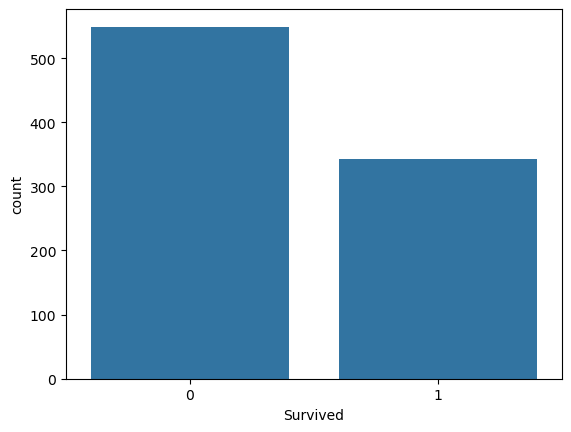

In [17]:
# функция countplot() сама посчитает количество наблюдений в каждой из категорий
sns.countplot(x="Survived", data=titanic);

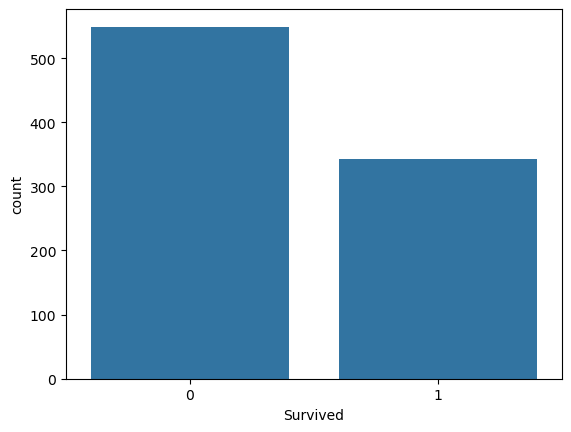

In [18]:
# для функции barplot() количество наблюдений можно посчитать
# с помощью метода .value_counts()
sns.barplot(x=titanic.Survived, y=titanic.Survived.value_counts());

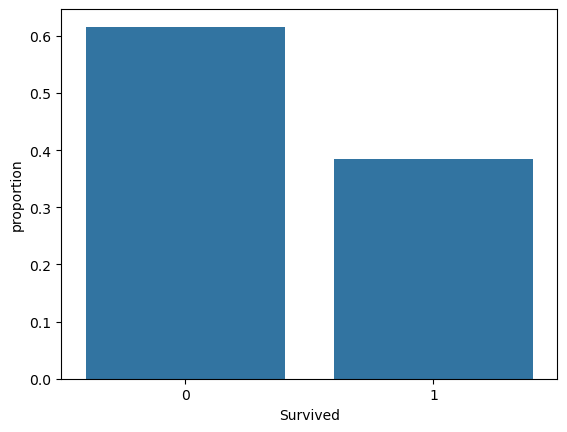

In [19]:
# относительное количество наблюдений удобно посчитать с параметром normalize = True
sns.barplot(x=titanic.Survived, y=titanic.Survived.value_counts(normalize=True));

Matplotlib

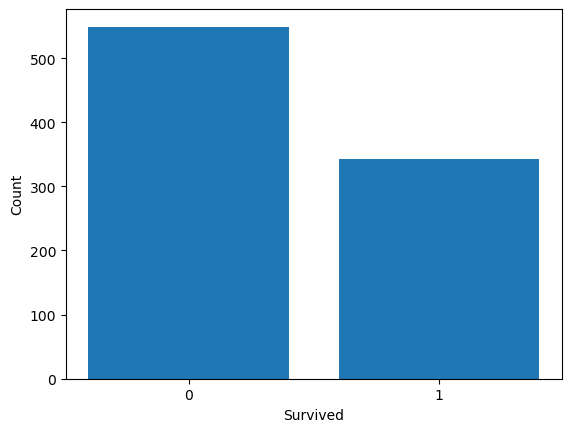

In [20]:
# первым параметром (по оси x) передадим уникальные значения,
# вторым параметром - количество наблюдений
plt.bar(
    titanic.Survived.unique(),
    titanic.Survived.value_counts(),
    # кроме того, явно пропишем значения оси x
    # (в противном случае будет указана просто числовая шкала)
    tick_label=["0", "1"],
)

plt.xlabel("Survived")
plt.ylabel("Count");

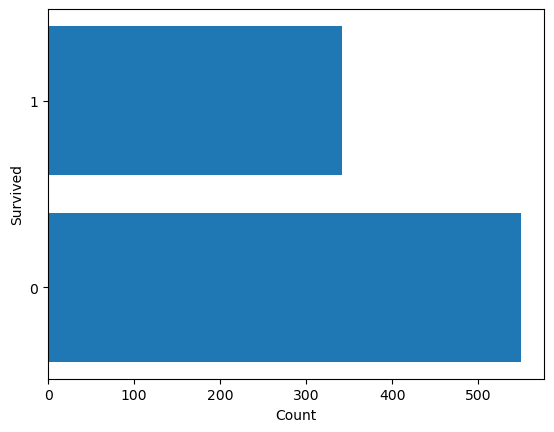

In [21]:
# горизонтальная столбчатая диаграмма строится почти так же
plt.barh(
    titanic.Survived.unique(), titanic.Survived.value_counts(), tick_label=["0", "1"]
)

plt.xlabel("Count")
plt.ylabel("Survived");

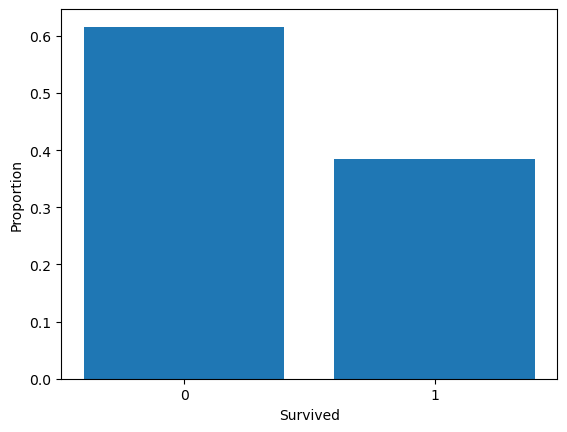

In [22]:
# найдем относительную частоту категорий с помощью параметра normalize = True
plt.bar(
    titanic.Survived.unique(),
    titanic.Survived.value_counts(normalize=True),
    tick_label=["0", "1"],
)

plt.xlabel("Survived")
plt.ylabel("Proportion");

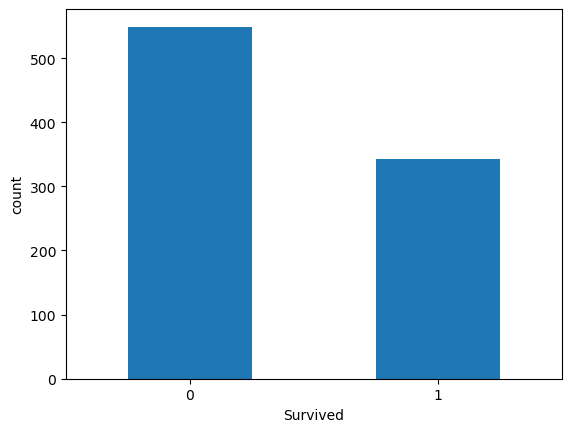

In [23]:
# перед применением метода .plot.bar() данные необходимо сгруппировать
# параметр rot = 0 ставит деления шкалы по оси x вертикально
titanic.groupby("Survived")["PassengerId"].count().plot.bar(rot=0)
plt.ylabel("count");

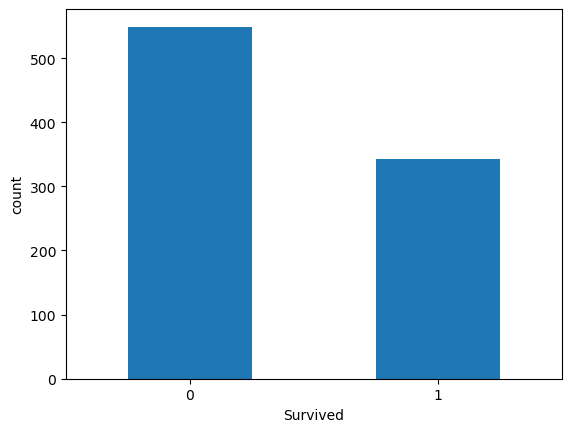

In [24]:
# можно также сначала выбрать один столбец
# и затем воспользоваться методом .value_counts()
titanic.Survived.value_counts().plot.bar(rot=0)
plt.xlabel("Survived")
plt.ylabel("count");

### Количественные данные

#### `df.describe()`

In [25]:
# применим метод .describe() к количественным признакам
tips[["total_bill", "tip"]].describe().round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
25%         13.35    2.00
50%         17.80    2.90
75%         24.13    3.56
max         50.81   10.00

In [26]:
# выведем второй и четвертый дециль, а также 99-й процентиль
tips[["total_bill", "tip"]].describe(percentiles=[0.2, 0.4, 0.99]).round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
20%         12.64    2.00
40%         16.22    2.48
50%         17.80    2.90
99%         48.23    7.21
max         50.81   10.00

#### Гистограмма

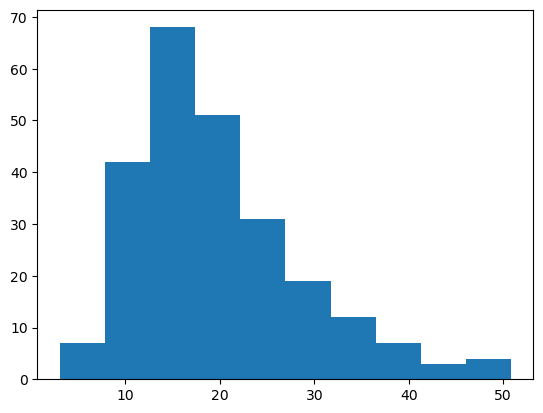

In [27]:
# гистограмма распределения размера чека с помощью библиотеки Matplotlib
plt.hist(tips.total_bill, bins=10);

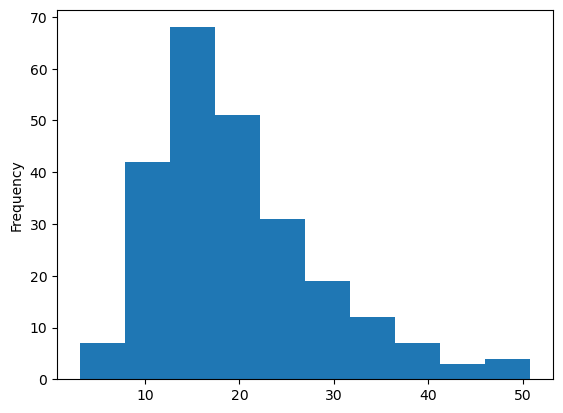

In [28]:
# такую же гистограмму можно построить с помощью Pandas
tips.total_bill.plot.hist(bins=10);

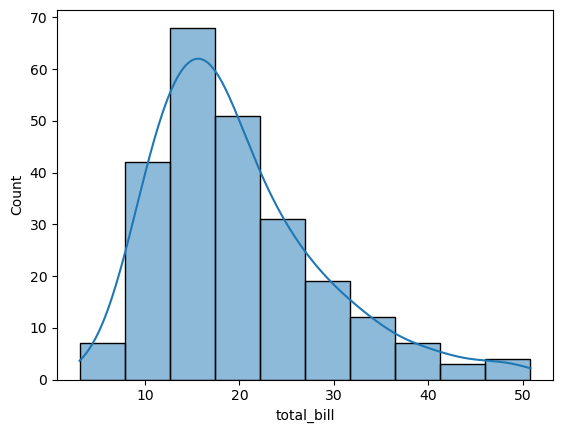

In [29]:
# в библиотеке Seaborn мы указываем источник данных,
# что будет на оси x и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data=tips, x="total_bill", bins=10, kde=True);

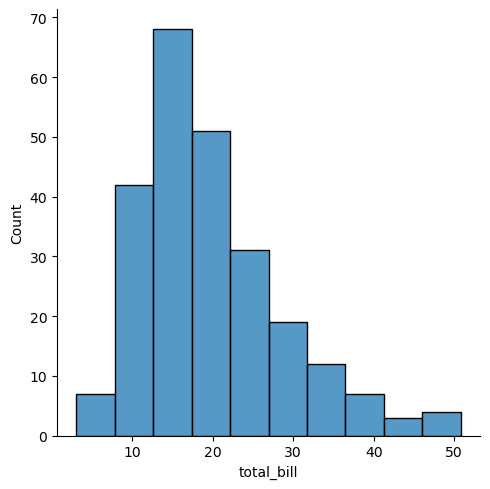

In [30]:
# функция displot() - еще один способ построить гистограмму в Seaborn
# для этого используется параметр по умолчанию kind = 'hist'
sns.displot(data=tips, x="total_bill", kind="hist", bins=10);

In [31]:
# Plotly, как уже было сказано, позволяет построить интерактивную гистограмму
# параметр text_auto = True выводит количество наблюдений в каждом интервале
px.histogram(tips, x="total_bill", nbins=10, text_auto=True)

#### График плотности

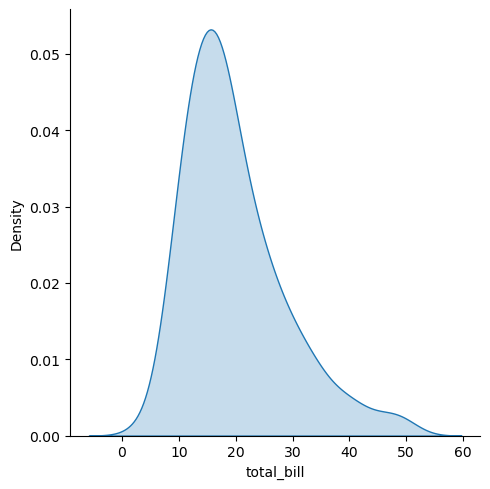

In [32]:
# используем функцию displot(), которой передадим датафрейм tips,
# какой признак вывести по оси x, тип графика kind = 'kde',
# а также заполним график цветом через fill = True
sns.displot(tips, x="total_bill", kind="kde", fill=True);

#### boxplot

Seaborn

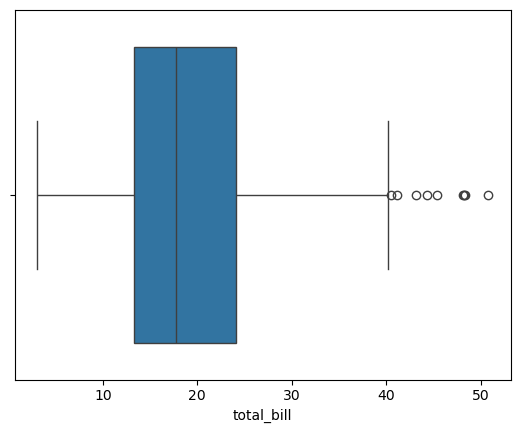

In [33]:
# функции boxplot() достаточно передать параметр x
# с данными необходимого столбца
sns.boxplot(x=tips.total_bill);

In [34]:
# если передать нужный нам столбец в параметр x,
# то мы получим горизонтальный boxplot
px.box(tips, x="total_bill")

In [35]:
# если в y, то вертикальный
px.box(tips, y="total_bill")

Matplotlib и Pandas

##### plt.boxplot(tips.total_bill);

##### tips.total_bill.plot.box();

#### Гистограмма и boxplot

Matplotlib и Seaborn

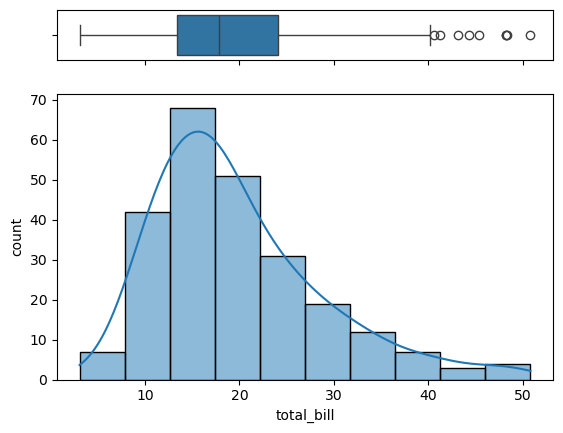

In [36]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(
    2,  # две строки в сетке подграфиков,
    sharex=True,  # единая шкала по оси x и
    gridspec_kw={"height_ratios": (0.15, 0.85)},
)  # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик
# поместить каждый из них
sns.boxplot(x=tips["total_bill"], ax=ax_box)
sns.histplot(x=tips["total_bill"], ax=ax_hist, bins=10, kde=True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel="")  # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel="total_bill")
ax_hist.set(ylabel="count")

# выведем результат
plt.show()

Plotly

In [37]:
# воспользуемся функцией histogram(),
px.histogram(
    tips,  # передав ей датафрейм,
    x="total_bill",  # конкретный столбец для построения данных,
    nbins=10,  # количество интервалов в гистограмме
    marginal="box",
)  # и тип дополнительного графика

## Нахождение отличий

### Два категориальных признака

#### countplot и barplot

Seaborn

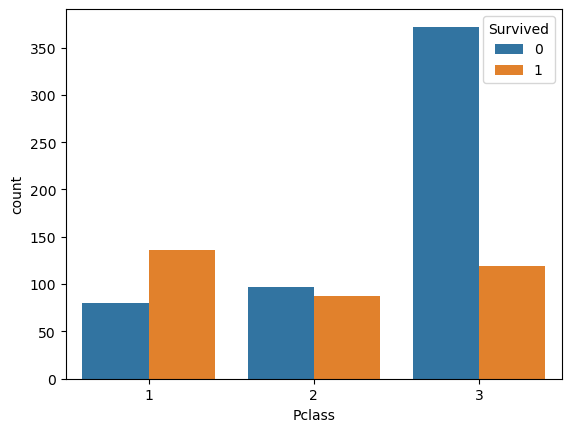

In [38]:
# создадим grouped countplot, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших (1)
sns.countplot(x="Pclass", hue="Survived", data=titanic);

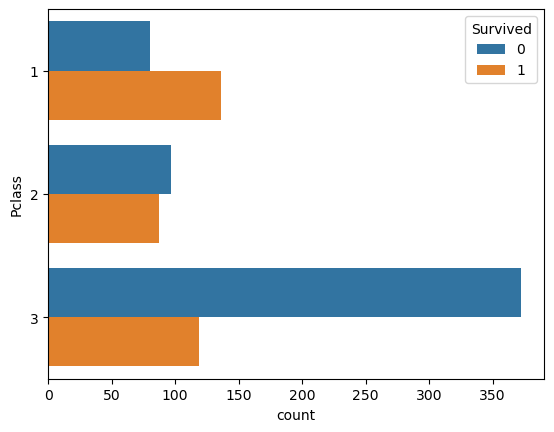

In [39]:
# горизонтальный countplot получится,
# если передать данные о классе пассажира в переменную y
sns.countplot(y="Pclass", hue="Survived", data=titanic);

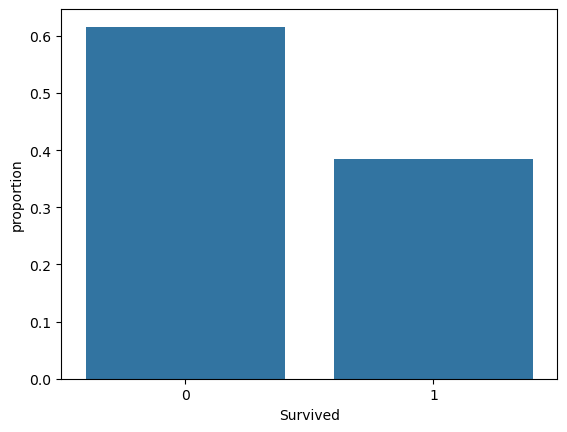

In [40]:
# относительное количество наблюдений удобно посчитать с параметром normalize = True
sns.barplot(x=titanic.Survived, y=titanic.Survived.value_counts(normalize=True));

Matplotlib

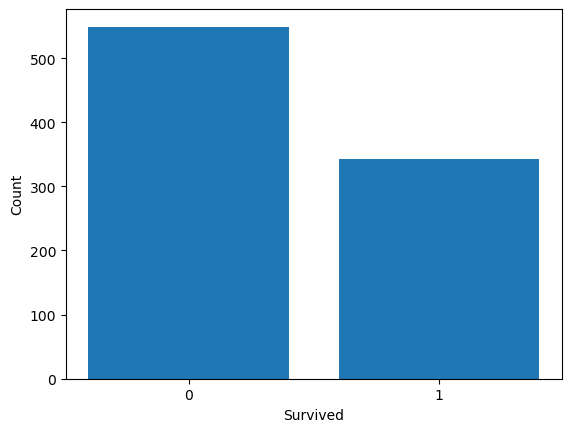

In [41]:
# первым параметром (по оси x) передадим уникальные значения,
# вторым параметром - количество наблюдений
plt.bar(
    titanic.Survived.unique(),
    titanic.Survived.value_counts(),
    # кроме того, явно пропишем значения оси x
    # (в противном случае будет указана просто числовая шкала)
    tick_label=["0", "1"],
)

plt.xlabel("Survived")
plt.ylabel("Count");

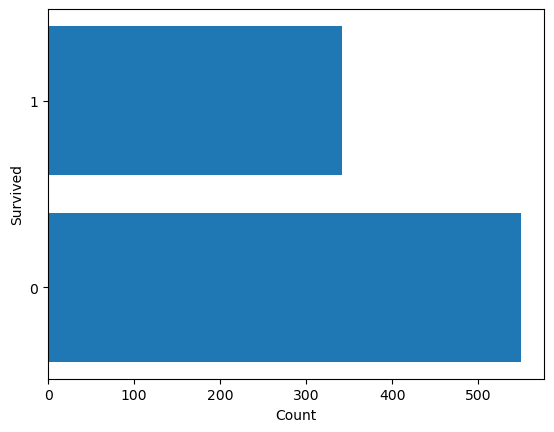

In [42]:
# горизонтальная столбчатая диаграмма строится почти так же
plt.barh(
    titanic.Survived.unique(), titanic.Survived.value_counts(), tick_label=["0", "1"]
)

plt.xlabel("Count")
plt.ylabel("Survived");

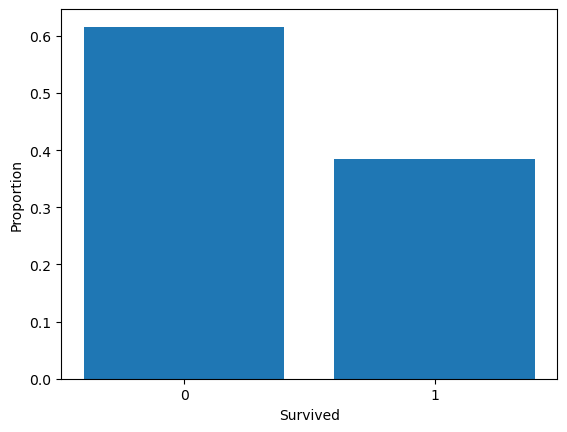

In [43]:
# найдем относительную частоту категорий с помощью параметра normalize = True
plt.bar(
    titanic.Survived.unique(),
    titanic.Survived.value_counts(normalize=True),
    tick_label=["0", "1"],
)

plt.xlabel("Survived")
plt.ylabel("Proportion");

Pandas

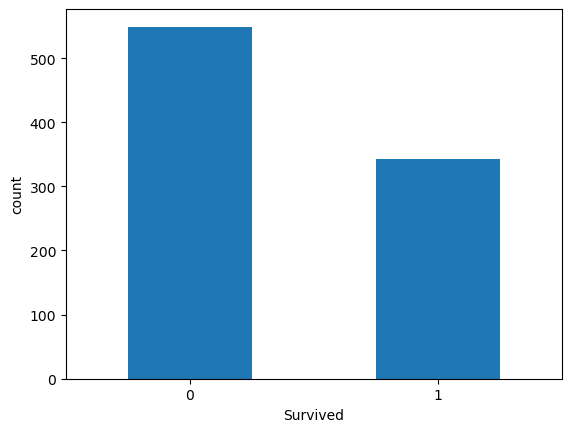

In [44]:
# перед применением метода .plot.bar() данные необходимо сгруппировать
# параметр rot = 0 ставит деления шкалы по оси x вертикально
titanic.groupby("Survived")["PassengerId"].count().plot.bar(rot=0)
plt.ylabel("count");

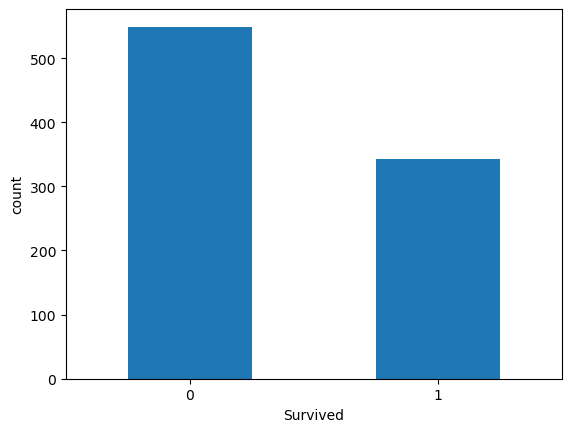

In [45]:
# можно также сначала выбрать один столбец
# и затем воспользоваться методом .value_counts()
titanic.Survived.value_counts().plot.bar(rot=0)
plt.xlabel("Survived")
plt.ylabel("count");

### Количественные данные

#### `df.describe()`

In [46]:
# применим метод .describe() к количественным признакам
tips[["total_bill", "tip"]].describe().round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
25%         13.35    2.00
50%         17.80    2.90
75%         24.13    3.56
max         50.81   10.00

In [47]:
# выведем второй и четвертый дециль, а также 99-й процентиль
tips[["total_bill", "tip"]].describe(percentiles=[0.2, 0.4, 0.99]).round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
20%         12.64    2.00
40%         16.22    2.48
50%         17.80    2.90
99%         48.23    7.21
max         50.81   10.00

#### Гистограмма

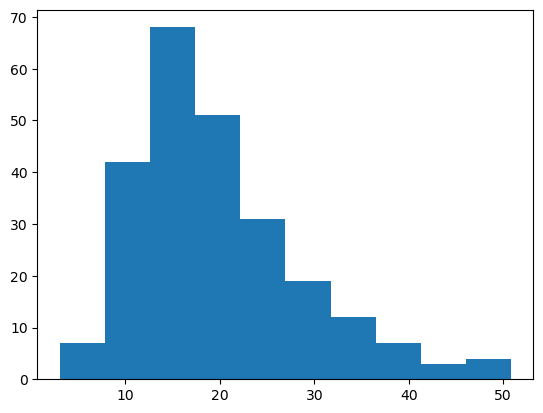

In [48]:
# гистограмма распределения размера чека с помощью библиотеки Matplotlib
plt.hist(tips.total_bill, bins=10);

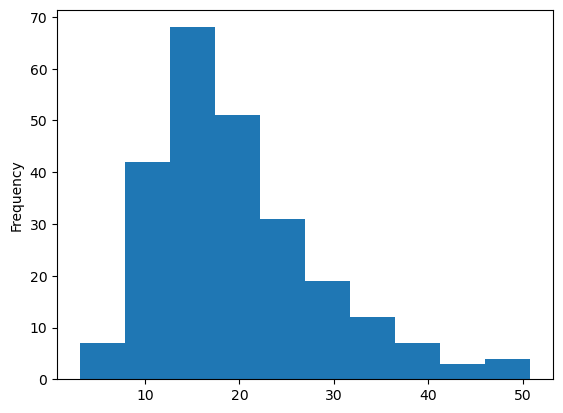

In [49]:
# такую же гистограмму можно построить с помощью Pandas
tips.total_bill.plot.hist(bins=10);

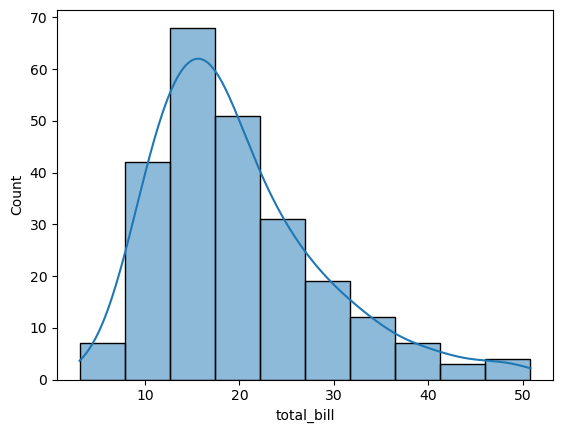

In [50]:
# в библиотеке Seaborn мы указываем источник данных,
# что будет на оси x и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data=tips, x="total_bill", bins=10, kde=True);

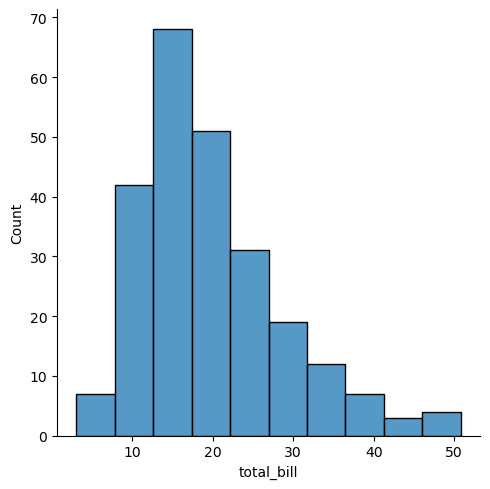

In [51]:
# функция displot() - еще один способ построить гистограмму в Seaborn
# для этого используется параметр по умолчанию kind = 'hist'
sns.displot(data=tips, x="total_bill", kind="hist", bins=10);

In [52]:
# Plotly, как уже было сказано, позволяет построить интерактивную гистограмму
# параметр text_auto = True выводит количество наблюдений в каждом интервале
px.histogram(tips, x="total_bill", nbins=10, text_auto=True)

#### График плотности

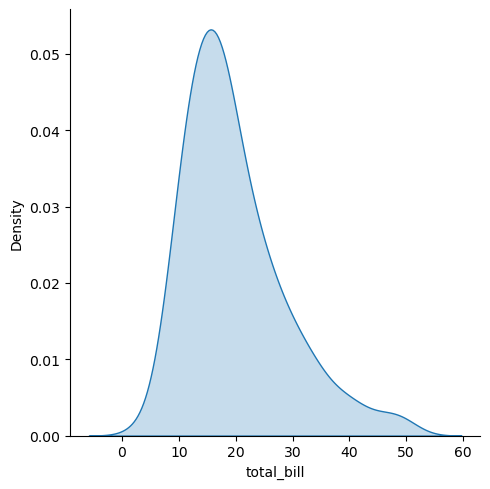

In [53]:
# используем функцию displot(), которой передадим датафрейм tips,
# какой признак вывести по оси x, тип графика kind = 'kde',
# а также заполним график цветом через fill = True
sns.displot(tips, x="total_bill", kind="kde", fill=True);

#### boxplot

Seaborn

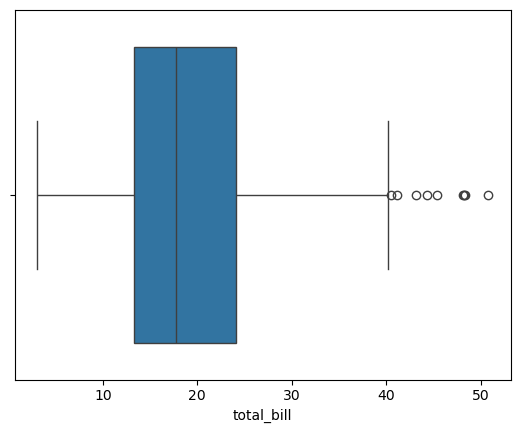

In [54]:
# функции boxplot() достаточно передать параметр x
# с данными необходимого столбца
sns.boxplot(x=tips.total_bill);

Plotly

In [55]:
# если передать нужный нам столбец в параметр x,
# то мы получим горизонтальный boxplot
px.box(tips, x="total_bill")

In [56]:
# если в y, то вертикальный
px.box(tips, y="total_bill")

Matplotlib и Pandas

##### plt.boxplot(tips.total_bill);

##### tips.total_bill.plot.box();

#### Гистограмма и boxplot

Matplotlib и Seaborn

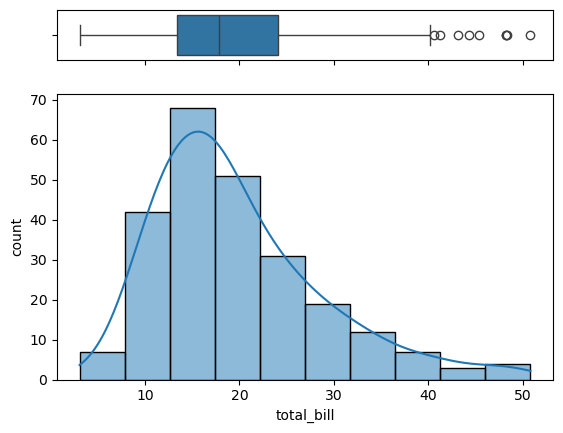

In [57]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(
    2,  # две строки в сетке подграфиков,
    sharex=True,  # единая шкала по оси x и
    gridspec_kw={"height_ratios": (0.15, 0.85)},
)  # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик
# поместить каждый из них
sns.boxplot(x=tips["total_bill"], ax=ax_box)
sns.histplot(x=tips["total_bill"], ax=ax_hist, bins=10, kde=True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel="")  # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel="total_bill")
ax_hist.set(ylabel="count")

# выведем результат
plt.show()

Plotly

In [58]:
# воспользуемся функцией histogram(),
px.histogram(
    tips,  # передав ей датафрейм,
    x="total_bill",  # конкретный столбец для построения данных,
    nbins=10,  # количество интервалов в гистограмме
    marginal="box",
)  # и тип дополнительного графика

## Нахождение отличий

### Два категориальных признака

#### countplot и barplot

Seaborn

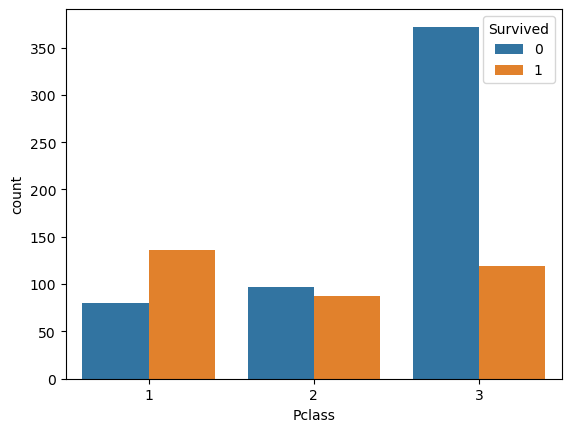

In [59]:
# создадим grouped countplot, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших (1)
sns.countplot(x="Pclass", hue="Survived", data=titanic);

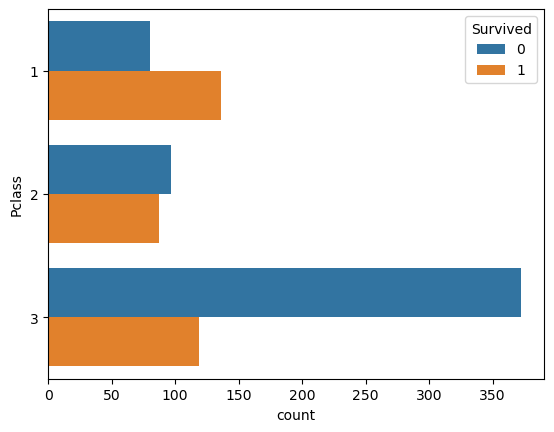

In [60]:
# горизонтальный countplot получится,
# если передать данные о классе пассажира в переменную y
sns.countplot(y="Pclass", hue="Survived", data=titanic);

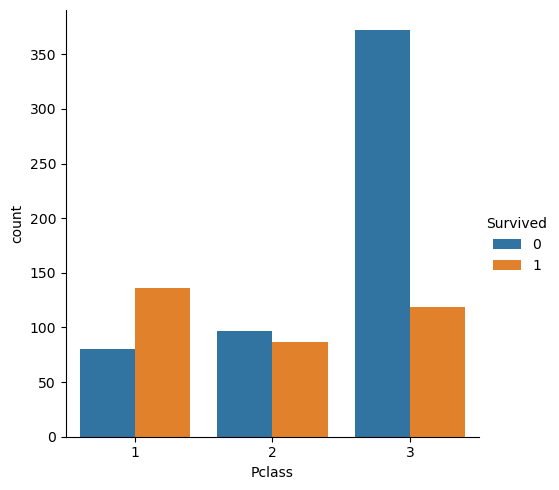

In [61]:
# передадим функции catplot() параметр kind = 'count' для создания графика countplot
sns.catplot(x="Pclass", hue="Survived", data=titanic, kind="count");

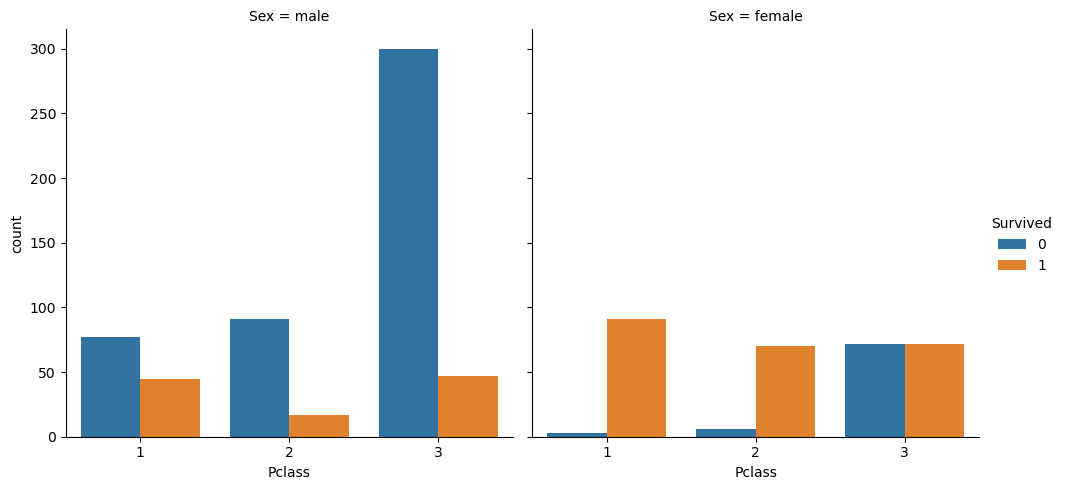

In [62]:
# добавим еще один признак (пол) через параметр col
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=titanic);

Plotly

In [63]:
px.histogram(
    titanic,  # возьмем данные
    x="Pclass",  # диаграмму будем строить по столбцу Pclass
    color="Survived",  # с разбивкой на выживших и погибших
    barmode="group",  # разделенные столбцы располагаются рядом друг с другом
    text_auto=True,  # выведем количество наблюдений в каждом столбце
    title="Survival by class",  # также добавим заголовок
)

In [64]:
# создадим объект fig, в который поместим столбчатую диаграмму
fig = px.histogram(
    titanic,
    x="Pclass",
    color="Survived",
    barmode="stack",  # каждый столбец класса будет разделен по признаку Survived
    text_auto=True,
)

# применим метод .update_layout() к объекту fig
fig.update_layout(
    title_text="Survival by class",  # заголовок
    xaxis_title_text="Pclass",  # подпись к оси x
    yaxis_title_text="Count",  # подпись к оси y
    bargap=0.2,  # расстояние между столбцами
    # подписи классов пассажиров на оси x
    xaxis={
        "tickmode": "array",
        "tickvals": [1, 2, 3],
        "ticktext": ["Class 1", "Class 2", "Class 3"],
    },
)

fig.show()

In [65]:
# используем новый параметр facet_col = 'Sex'
px.histogram(
    titanic,
    x="Pclass",
    color="Survived",
    facet_col="Sex",
    barmode="group",
    text_auto=True,
    title="Survival by class and gender",
)

In [66]:
# используем одновременно параметры facet_col и facet_row
px.histogram(
    titanic,
    x="Pclass",
    color="Survived",
    facet_col="Embarked",
    facet_row="Sex",
    barmode="group",
    text_auto=True,
    title="Survival by class, gender and port of embarkation",
)

In [67]:
# используем новый параметр facet_col = 'Sex'
px.histogram(
    titanic,
    x="Pclass",
    color="Survived",
    facet_col="Sex",
    barmode="group",
    text_auto=True,
    title="Survival by class and gender",
)

In [68]:
# используем одновременно параметры facet_col и facet_row
px.histogram(
    titanic,
    x="Pclass",
    color="Survived",
    facet_col="Embarked",
    facet_row="Sex",
    barmode="group",
    text_auto=True,
    title="Survival by class, gender and port of embarkation",
)

#### Таблица сопряженности  

Абсолютное количество наблюдений

In [69]:
# создадим таблицу сопряженности
# в параметр index мы передадим данные по классу, в columns - по выживаемости
pclass_abs = pd.crosstab(index=titanic.Pclass, columns=titanic.Survived)

# создадим названия категорий класса и выживаемости
pclass_abs.index = pd.Index(["Class 1", "Class 2", "Class 3"])
pclass_abs.columns = ["Not survived", "Survived"]

# выведем результат
pclass_abs

Not survived  Survived
Class 1            80       136
Class 2            97        87
Class 3           372       119

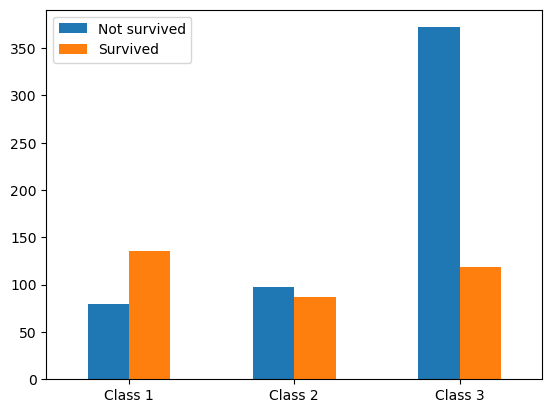

In [70]:
# построим grouped barplot в библиотеке Pandas
# rot = 0 делает подписи оси х вертикальными
pclass_abs.plot.bar(rot=0);

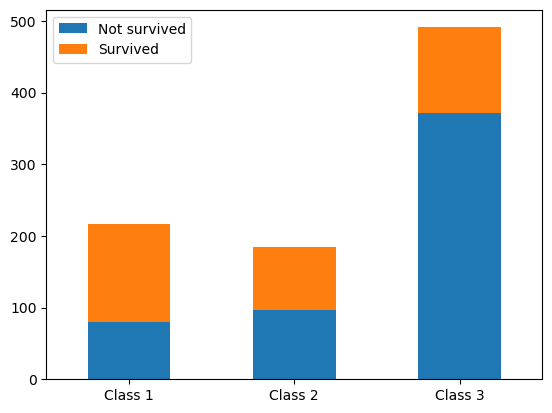

In [71]:
# параметр stacked = True делит каждый столбец класса на выживших и погибших
pclass_abs.plot.bar(rot=0, stacked=True);

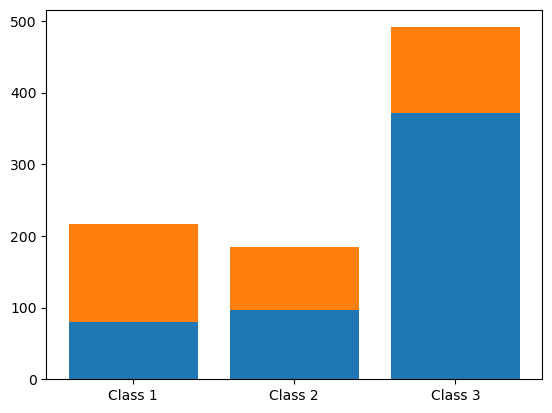

In [72]:
# в Matplotlib вначале создадим barplot для одной (нижней) категории
plt.bar(pclass_abs.index, pclass_abs["Not survived"])
# затем еще один barplot для второй (верхней), указав нижнуюю в параметре bottom
plt.bar(pclass_abs.index, pclass_abs["Survived"], bottom=pclass_abs["Not survived"]);

Таблица сопряженности вместе с суммой

In [73]:
# для подсчета суммы по строкам и столбцам используется параметр margins = True
pclass_abs = pd.crosstab(index=titanic.Pclass, columns=titanic.Survived, margins=True)

# новой строке и новому столбцу с суммами необходимо дать название (например, Total)
pclass_abs.index = pd.Index(["Class 1", "Class 2", "Class 3", "Total"])
pclass_abs.columns = ["Not survived", "Survived", "Total"]
pclass_abs

Not survived  Survived  Total
Class 1            80       136    216
Class 2            97        87    184
Class 3           372       119    491
Total             549       342    891

Относительное количество наблюдений

In [74]:
# так как нам важно понимать долю выживших и долю погибших, укажем normalize = # 'index'
# в этом случае каждое значение будет разделено на общее количество
# наблюдений # в строке (!)
pclass_rel = pd.crosstab(
    index=titanic.Pclass, columns=titanic.Survived, normalize="index"
)

pclass_rel.index = pd.Index(["Class 1", "Class 2", "Class 3"])
pclass_rel.columns = ["Not survived", "Survived"]
pclass_rel

Not survived  Survived
Class 1      0.370370  0.629630
Class 2      0.527174  0.472826
Class 3      0.757637  0.242363

In [75]:
# если бы в индексе (в строках) была выживаемость, а в столбцах - классы,
# то логично было бы использовать параметр normalize = 'columns' для деления
# на сумму по столбцам
pclass_rel_t = pd.crosstab(
    index=titanic.Survived, columns=titanic.Pclass, normalize="columns"
)

pclass_rel_t.index = pd.Index(["Not survived", "Survived"])
pclass_rel_t.columns = ["Class 1", "Class 2", "Class 3"]
pclass_rel_t

Class 1   Class 2   Class 3
Not survived  0.37037  0.527174  0.757637
Survived      0.62963  0.472826  0.242363

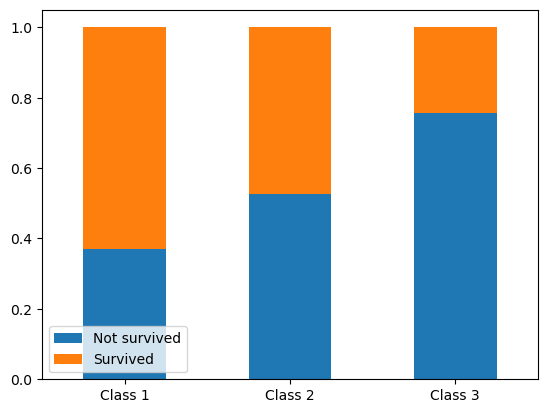

In [76]:
# теперь на stacked barplot мы видим доли выживших в каждом из классов
pclass_rel.plot.bar(rot=0, stacked=True).legend(loc="lower left");

### Количественный и категориальный признаки

#### rcParams

In [77]:
# и посмотрим, какой размер графиков (ключ figure.figsize) установлен по умолчанию
matplotlib.rcParams["figure.figsize"]

[6.4, 4.8]

In [78]:
# обновим этот параметр через прямое внесение изменений в значение словаря
matplotlib.rcParams["figure.figsize"] = (7, 5)
matplotlib.rcParams["figure.figsize"]

[7.0, 5.0]

In [79]:
# изменим размер обновив словарь в параметре rc функции sns.set()
sns.set(rc={"figure.figsize": (8, 5)})

# посмотрим на результат
matplotlib.rcParams["figure.figsize"]

[8.0, 5.0]

In [80]:
# весь словарь с параметрами доступен по атрибуту rcParams
# matplotlib.rcParams

#### Гистограммы

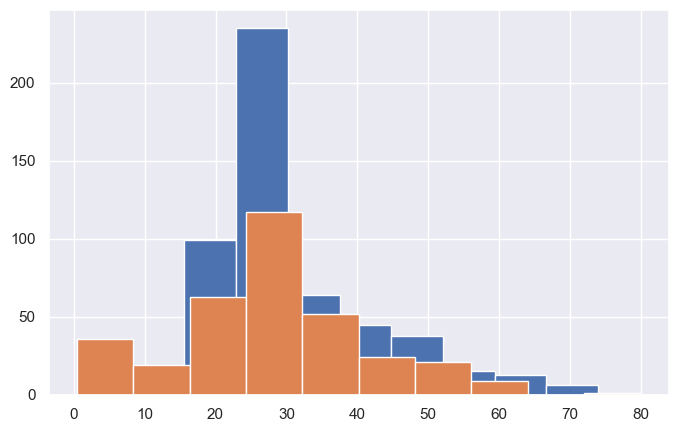

In [81]:
# выведем две гистограммы на одном графике в библиотеке Matplotlib
# отфильтруем данные по погибшим и выжившим и построим гистограммы по столбцу Age
plt.hist(x=titanic[titanic["Survived"] == 0]["Age"])
plt.hist(x=titanic[titanic["Survived"] == 1]["Age"]);

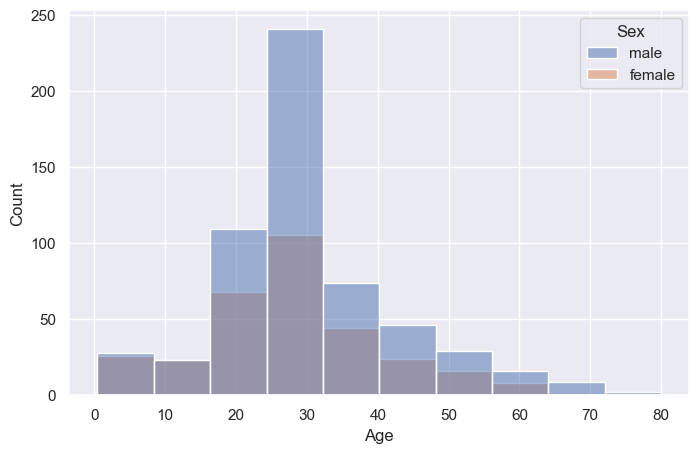

In [82]:
# сделаем то же самое в библиотеке Seaborn
# в x мы поместим количественный признак, в hue - категориальный
sns.histplot(x="Age", hue="Sex", data=titanic, bins=10);

In [83]:
# в Plotly количественный признак помещается в x, категориальный - в color
px.histogram(titanic, x="Age", color="Sex", nbins=8, text_auto=True)

разное количество элементов в выборках

In [84]:
# сравним количество мужчин и женщин на борту
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

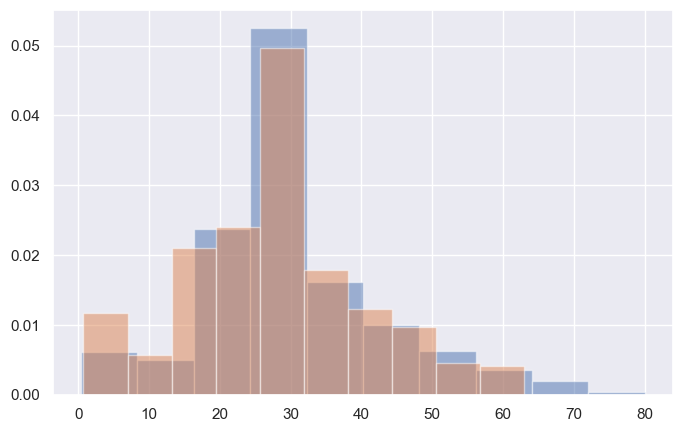

In [85]:
# создадим две гистограммы с параметров density = True
# параметр alpha отвечает за прозрачность каждой из гистограмм
plt.hist(x=titanic[titanic["Sex"] == "male"]["Age"], density=True, alpha=0.5)
plt.hist(x=titanic[titanic["Sex"] == "female"]["Age"], density=True, alpha=0.5);

#### Графики плотности

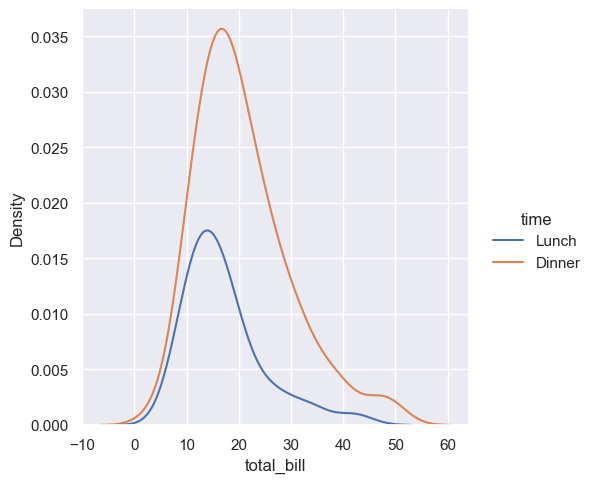

In [86]:
# построим графики плотности распределений суммы чека в обеденное и вечернее время
sns.displot(tips, x="total_bill", hue="time", kind="kde");

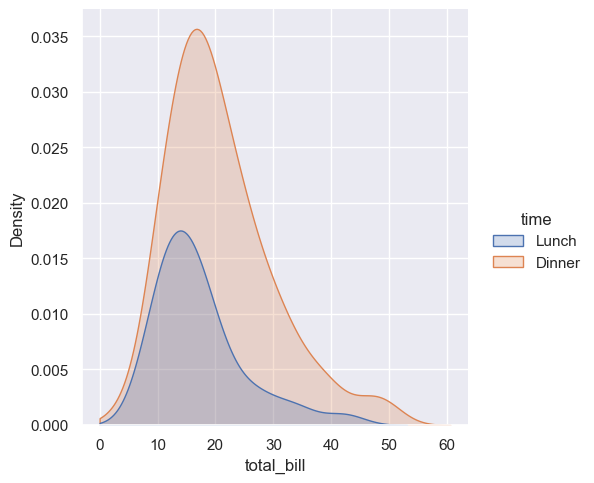

In [87]:
# зададим границы диапазона от 0 до 70 долларов через clip = (0, 70)
# дополнительно заполним цветом пространство под кривой с помощью fill = True
sns.displot(tips, x="total_bill", hue="time", kind="kde", clip=(0, 70), fill=True);

#### boxplots

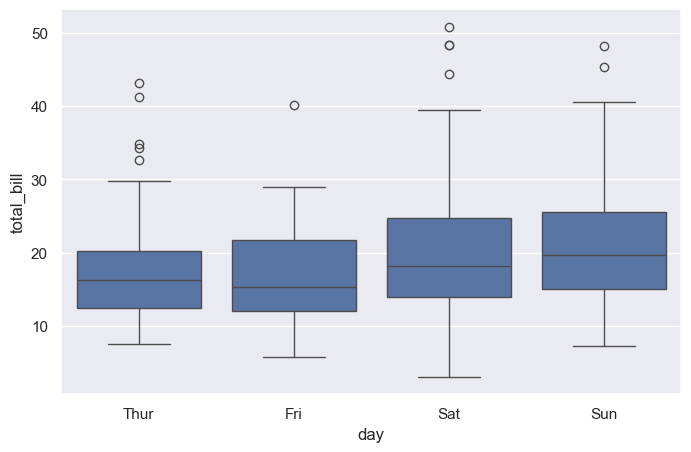

In [88]:
# посмотрим, как различается сумма чека по дням недели
sns.boxplot(x="day", y="total_bill", data=tips);

In [89]:
# а также в зависимости от того, обед это или ужин
px.box(tips, x="time", y="total_bill", points="all")

#### Гистограммы и boxplots

In [90]:
%%capture --no-display

px.histogram(
    tips,
    x="total_bill",  # количественный признак
    color="sex",  # категориальный признак
    marginal="box",
)  # дополнительный график: boxplot

#### stripplot, violinplot

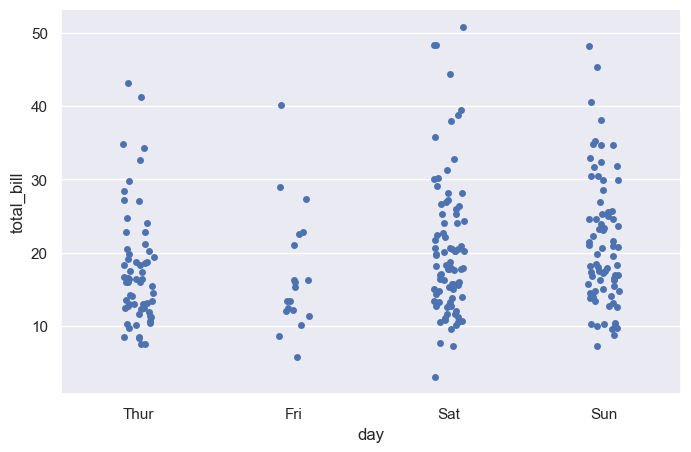

In [91]:
# по сути, stripplot - это точечная диаграмма (scatterplot),
# в которой одна из переменных категориальная
sns.stripplot(x="day", y="total_bill", data=tips);

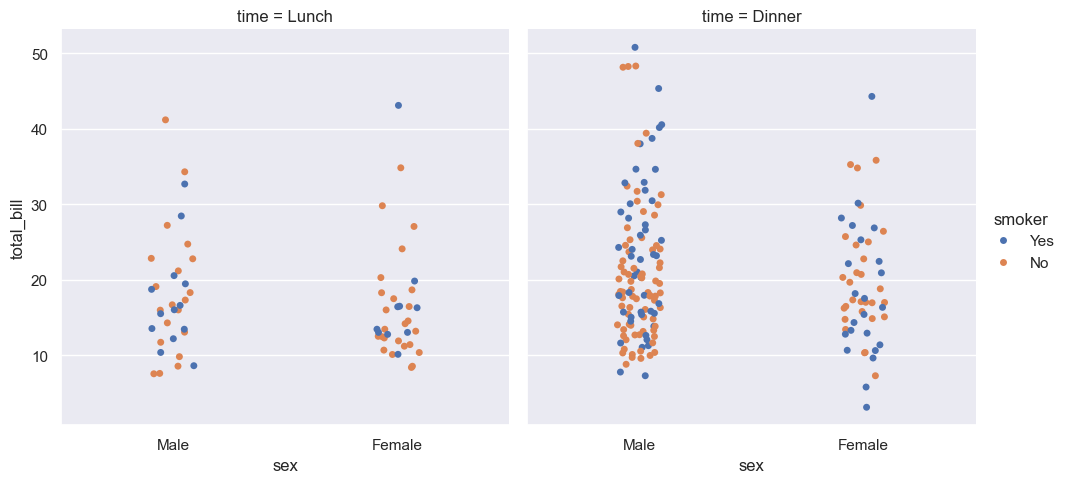

In [92]:
# с помощью sns.catplot() мы можем вывести
# распределение количественной переменной (total_bill)
# в разрезе трех качественных: статуса курильщика, пола и времени приема пищи
sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="strip");

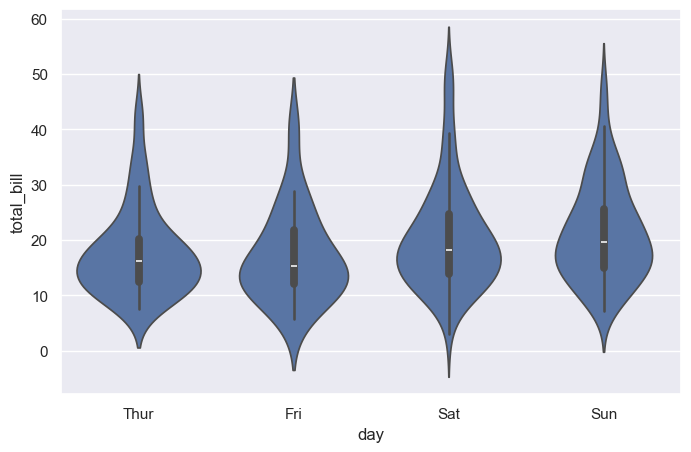

In [93]:
# построим violinplot для визуализации распределения суммы чека по дням недели
sns.violinplot(x="day", y="total_bill", data=tips);

### Преобразование данных

#### Логарифмическая шкала

In [ ]:
# соберем данные о продажах
products = ["Phone", "TV", "Laptop", "Desktop", "Tablet"]
sales = [800, 4, 550, 500, 3]

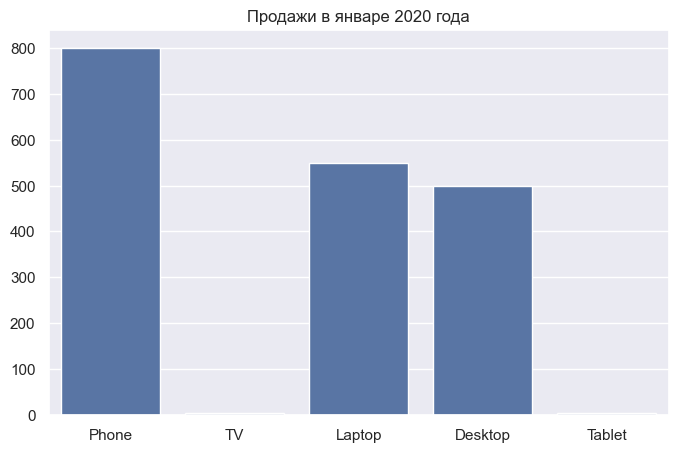

In [95]:
# отразим продажи с помощью столбчатой диаграммы
sns.barplot(x=products, y=sales)
plt.title("Продажи в январе 2020 года");

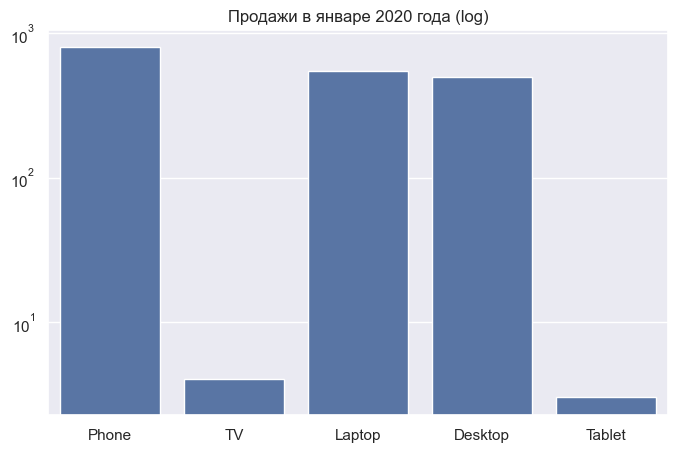

In [96]:
# теперь выведем эти же данные, но по логарифмической шкале
sns.barplot(x=products, y=sales)
plt.title("Продажи в январе 2020 года (log)")
plt.yscale("log");

#### Границы по оси y

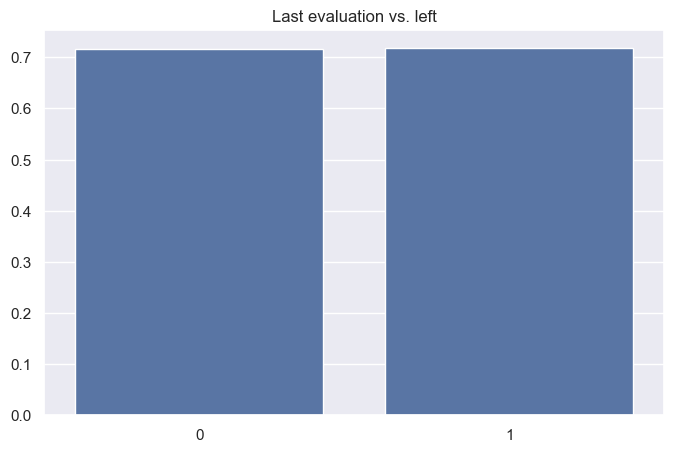

In [97]:
# код для получения этих значений вы найдете в блокноте
# с анализом текучести кадров
eval_left = [0.715473, 0.718113]

# построим столбчатую диаграмму,
# для оси x - выведем строковые категории,
# для y - доли покинувших компанию сотрудников
sns.barplot(x=["0", "1"], y=eval_left)
plt.title("Last evaluation vs. left");

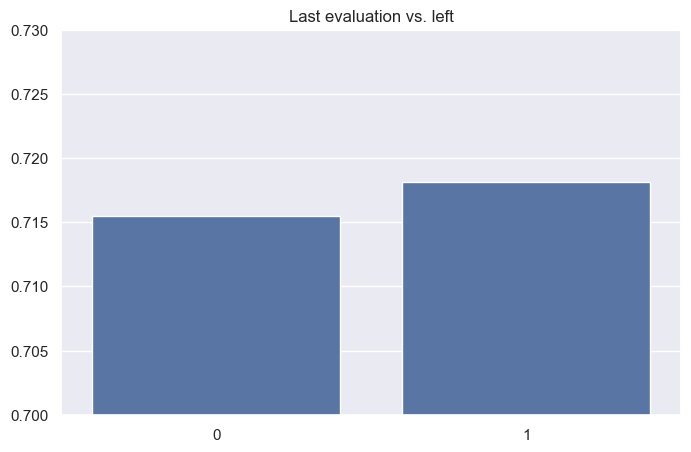

In [98]:
sns.barplot(x=["0", "1"], y=eval_left)
plt.title("Last evaluation vs. left")

# для ограничения значений по оси y можно использовать функцию plt.ylim()
plt.ylim(0.7, 0.73);

## Выявление взаимосвязи

### Линейный график

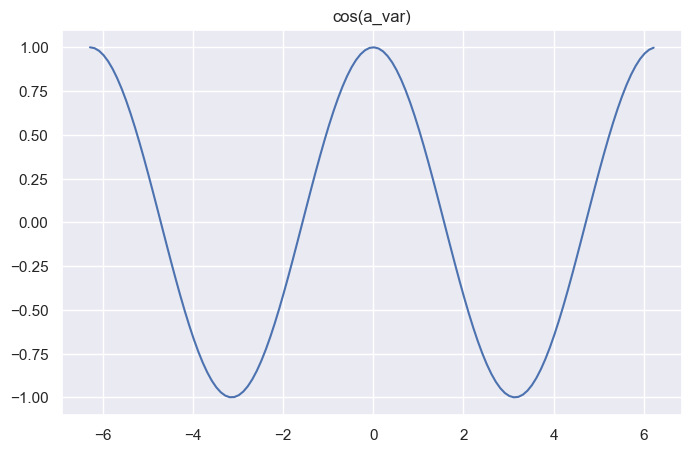

In [ ]:
# создадим последовательность от -2пи до 2пи
# с интервалом 0,1
a_var = np.arange(-2 * np.pi, 2 * np.pi, 0.1)

# сделаем эту последовательность значениями по оси x,
# а по оси y выведем функцию косинуса
plt.plot(a_var, np.cos(a_var))
plt.title("cos(a_var)");

### Точечная диаграмма

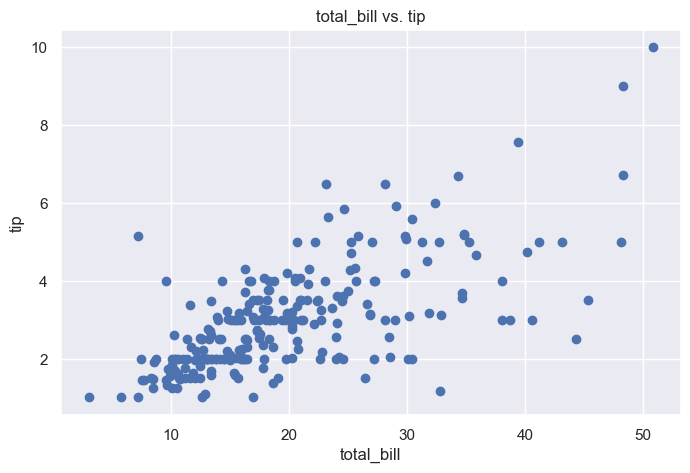

In [100]:
# построим точечную диаграмму в библиотеке Matplotlib
plt.scatter(tips.total_bill, tips.tip)
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.title("total_bill vs. tip");

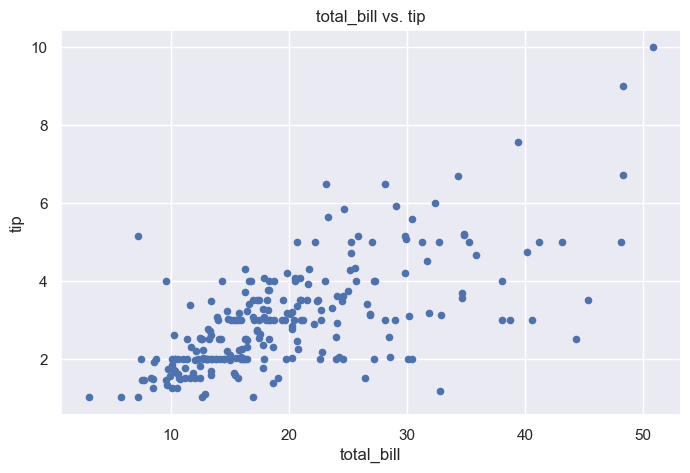

In [101]:
matplotlib_axes_logger.setLevel("ERROR")

# воспользуемся методом .plot.scatter()
tips.plot.scatter("total_bill", "tip")
plt.title("total_bill vs. tip");

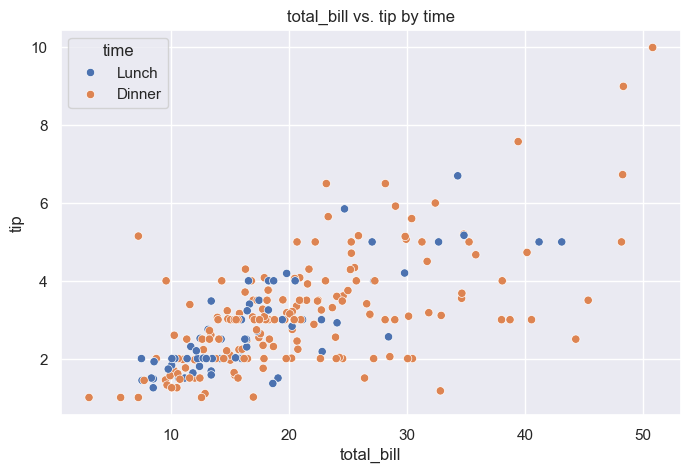

In [102]:
# категориальный признак добавляется через параметр hue
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
plt.title("total_bill vs. tip by time");

### pairplot

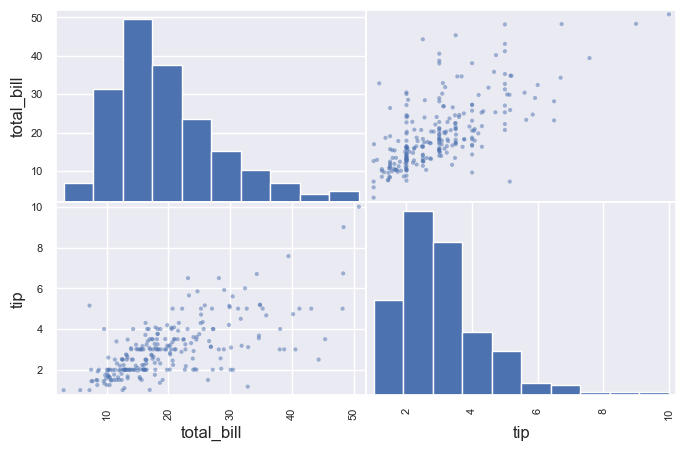

In [103]:
# построим pairplot в библиотеке Pandas
# в качестве данных возьмем столбцы total_bill и tip датасета tips
pd.plotting.scatter_matrix(tips[["total_bill", "tip"]]);

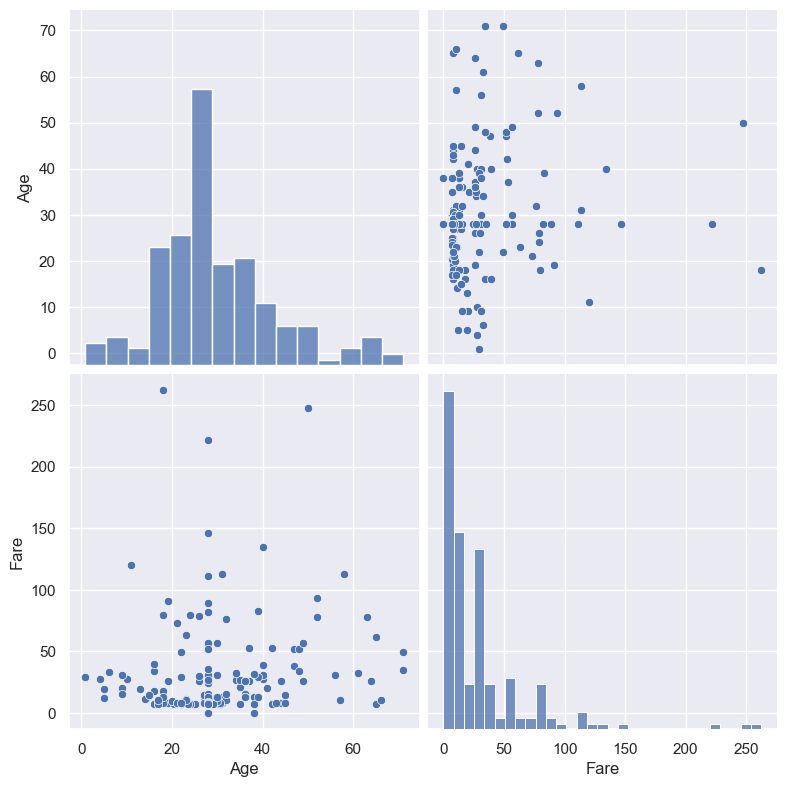

In [104]:
# построим pairplot в библиотеке Seaborn
# параметр height функции pairplot() задает высоту каждого графика в дюймах
sns.pairplot(titanic[["Age", "Fare"]].sample(frac=0.2, random_state=42), height=4);

In [105]:
# метод .sample() с параметром frac = 0.2 позволяет взять случайные 20% наблюдений
# параметр random_state обеспечивает воспроизводимость результата
titanic[["Age", "Fare"]].sample(frac=0.2, random_state=42)

Age     Fare
709  28.0  15.2458
439  31.0  10.5000
840  20.0   7.9250
720   6.0  33.0000
39   14.0  11.2417
..    ...      ...
852   9.0  15.2458
433  17.0   7.1250
773  28.0   7.2250
25   38.0  31.3875
84   17.0  10.5000

[178 rows x 2 columns]

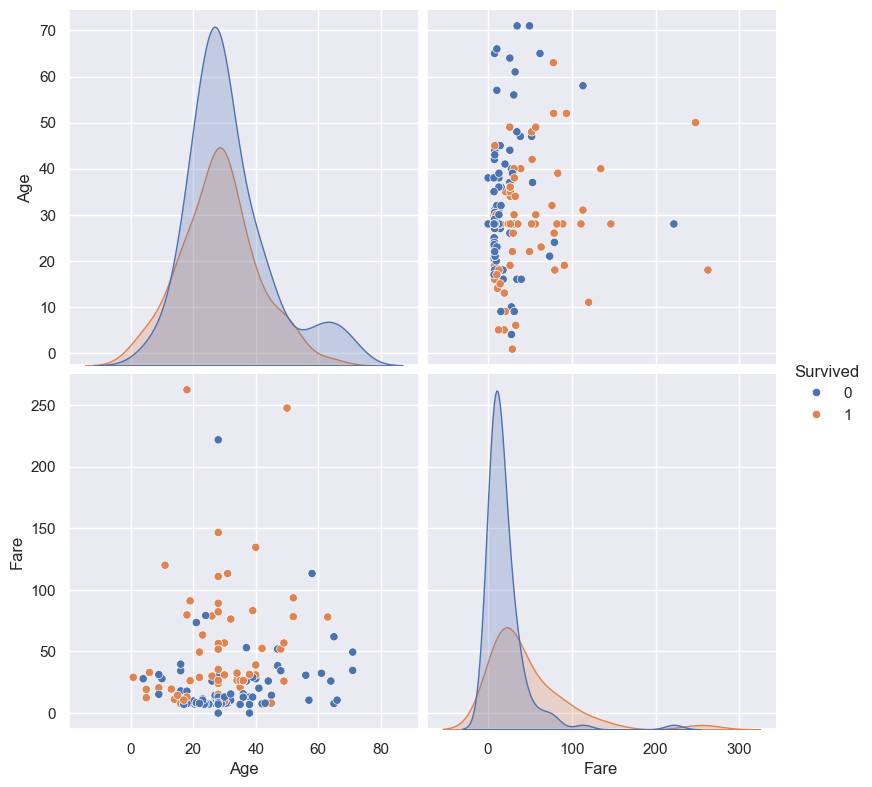

In [106]:
# при добавлении параметра hue (категориальной переменной) гистограмма
# по умолчанию превращается в график плотности
# обратите внимание, столбец Survived мы добавили
# и в параметр hue, и в датафрейм с данными
sns.pairplot(
    titanic[["Age", "Fare", "Survived"]].sample(frac=0.2, random_state=42),
    hue="Survived",
    height=4,
);

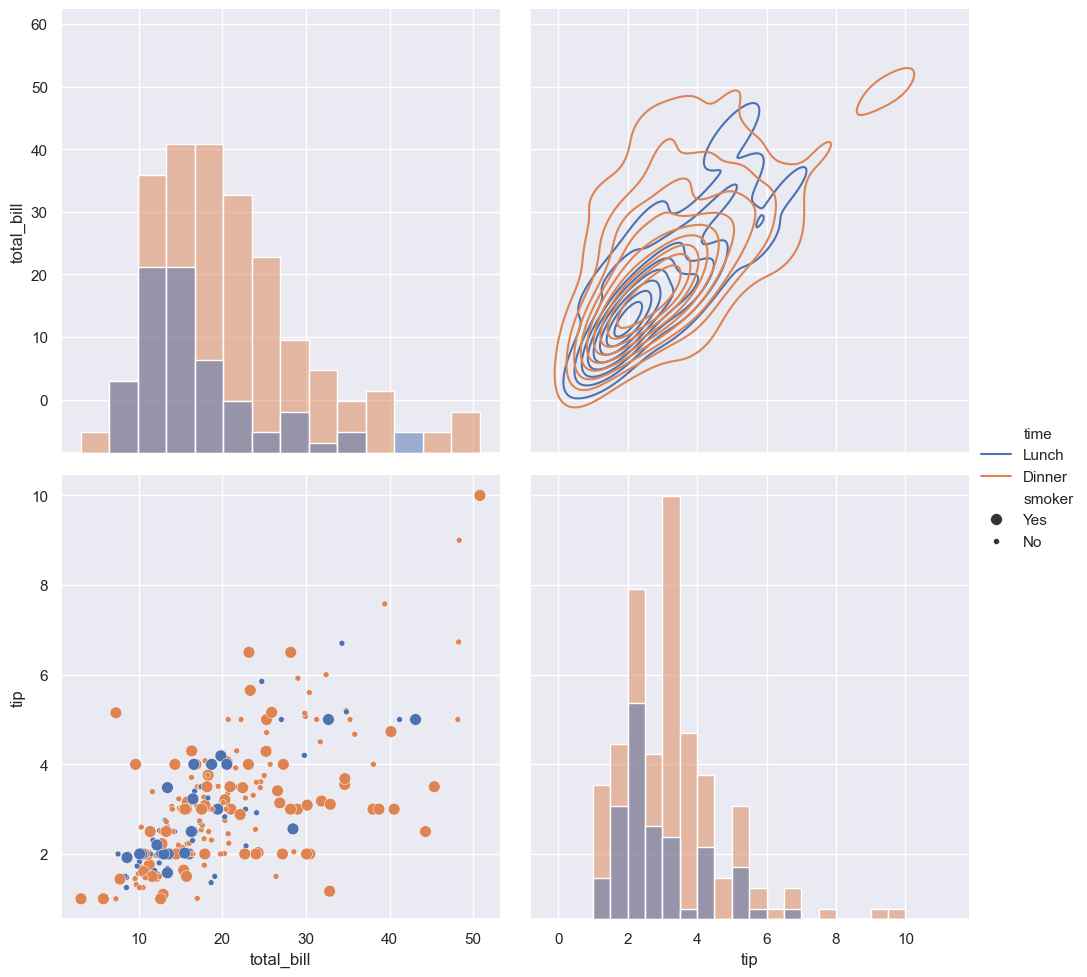

In [ ]:
# создадим объект класса PairGrid, в качестве данных передадим ему
# как количественные, так и категориальные переменные
b_var = sns.PairGrid(
    tips[["total_bill", "tip", "time", "smoker"]],
    # передадим в hue категориальный признак, который мы будем различать цветом
    hue="time",
    # зададим размер каждого графика
    height=5,
)

# метод .map_diag() с параметром sns.histplot выдаст гистограммы на диагонали
b_var.map_diag(sns.histplot)

# в левом нижнем углу мы выведем точечные диаграммы и зададим
# дополнительный категориальный признак smoker с помощью размера точек графика
b_var.map_lower(sns.scatterplot, size=tips["smoker"])

# в правом верхнем углу будет график плотности сразу двух количественных признаков
b_var.map_upper(sns.kdeplot)

# добавим легенду, adjust_subtitles = True делает текст легенды более аккуратным
b_var.add_legend(title="", adjust_subtitles=True);

### jointplot

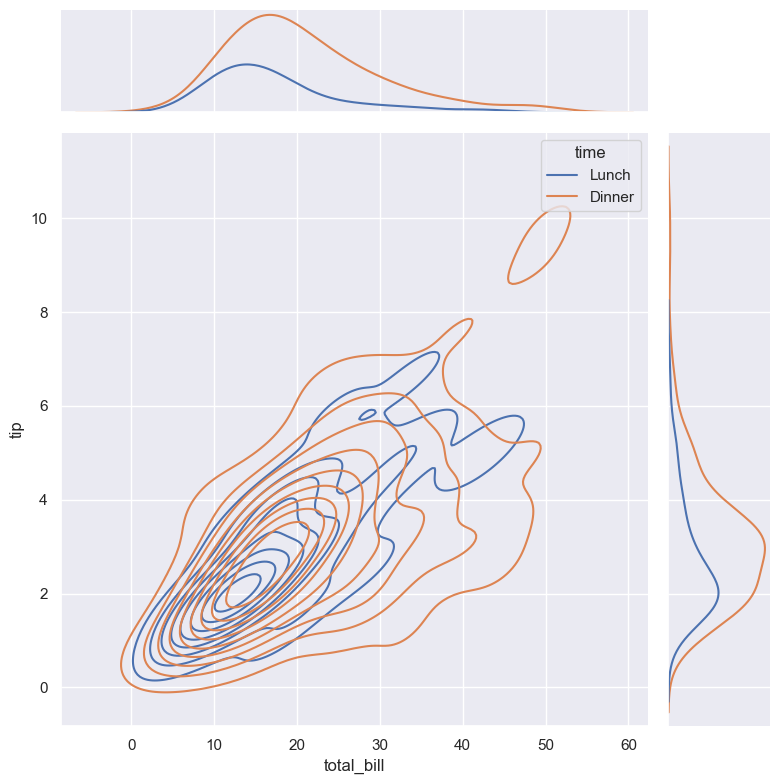

In [108]:
# построим график плотности совместного распределения
sns.jointplot(
    data=tips,  # передадим данные
    x="total_bill",  # пропишем количественные признаки,
    y="tip",
    hue="time",  # категориальный признак,
    kind="kde",  # тип графика
    height=8,
);  # и его размер

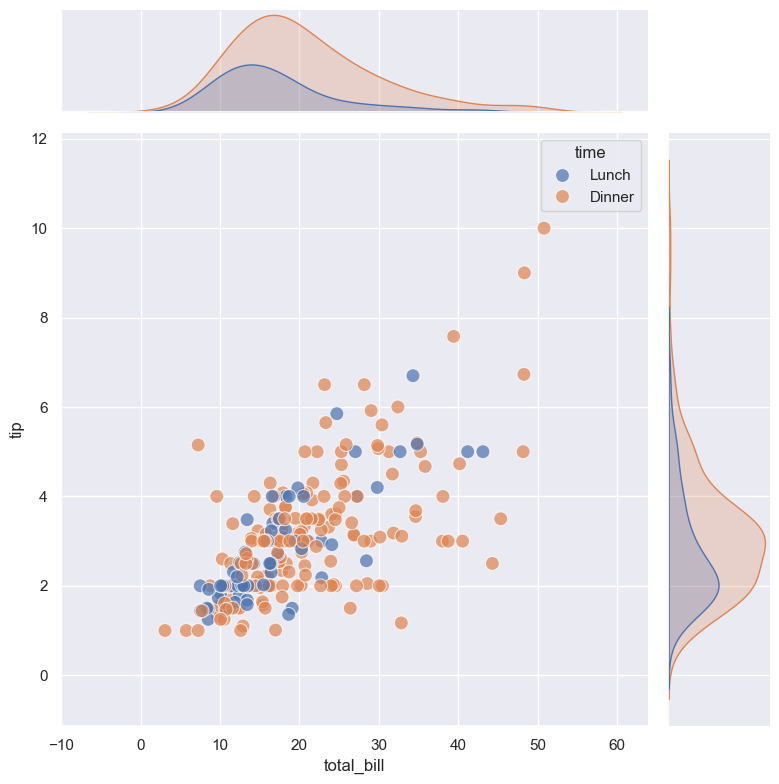

In [109]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    # построим точечную диаграмму
    kind="scatter",
    # дополнительно укажем размер точек
    s=100,
    # и их прозрачность
    alpha=0.7,
    height=8,
);

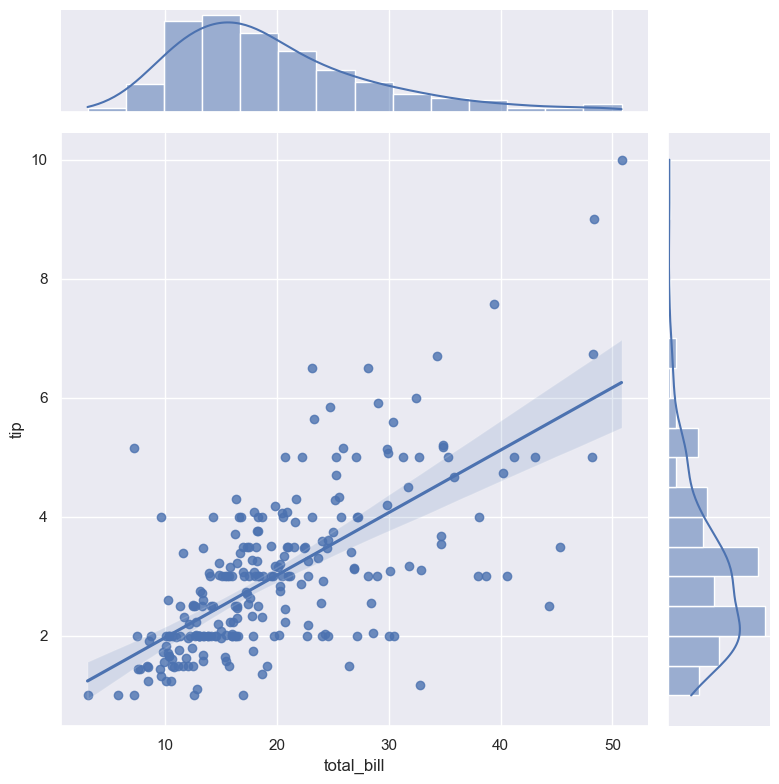

In [110]:
# для построения линии регрессии на данных
# используем параметр kind = 'reg'
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg", height=8);

### heatmap

In [111]:
# выведем корреляционную матрицу между total_bill и tip
tips[["total_bill", "tip"]].corr()

total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000

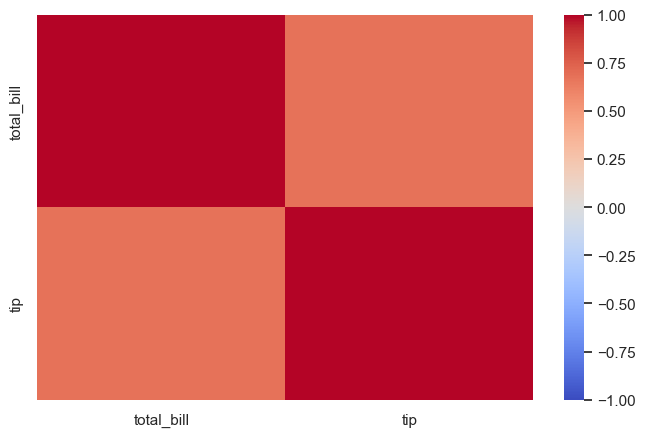

In [112]:
# поместим корреляционную матрицу в функцию sns.heatmap()
sns.heatmap(
    tips[["total_bill", "tip"]].corr(),
    # дополнительно пропишем цветовую гамму
    cmap="coolwarm",
    # и зададим диапазон от -1 до 1
    vmin=-1,
    vmax=1,
);

## Sweetviz

In [113]:
!pip install sweetviz

In [ ]:
train_csv_url = os.environ.get("TRAIN_CSV_URL", "")
test_csv_url = os.environ.get("TEST_CSV_URL", "")
response_train = requests.get(train_csv_url)
response_test = requests.get(test_csv_url)

# импортируем обучающую и тестовую выборки
train = pd.read_csv(io.BytesIO(response_train.content))
test = pd.read_csv(io.BytesIO(response_test.content))

In [115]:
# передадим оба датасета в функцию sv.comparison()
comparison = sv.compare(train, test)

                                             |          | [  0%]   00:00 -> (? left)

In [116]:
# посмотрим на тип созданного объекта
type(comparison)

sweetviz.dataframe_report.DataframeReport


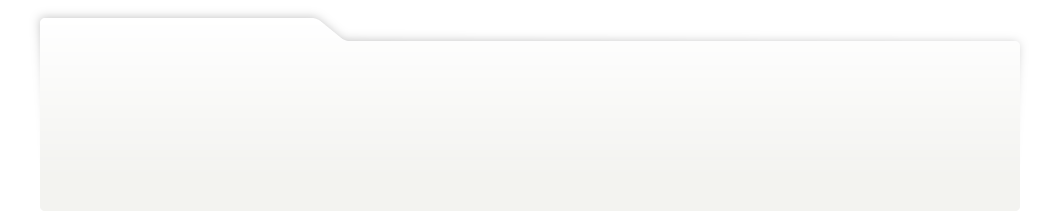
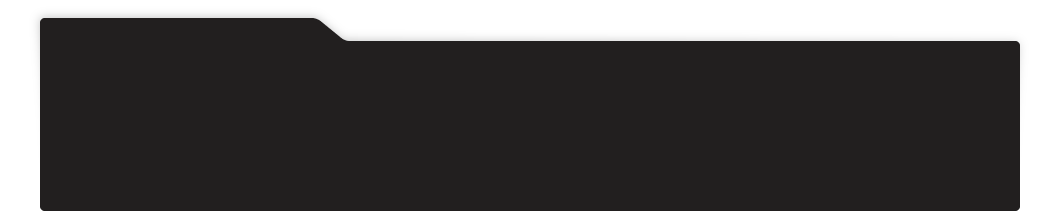
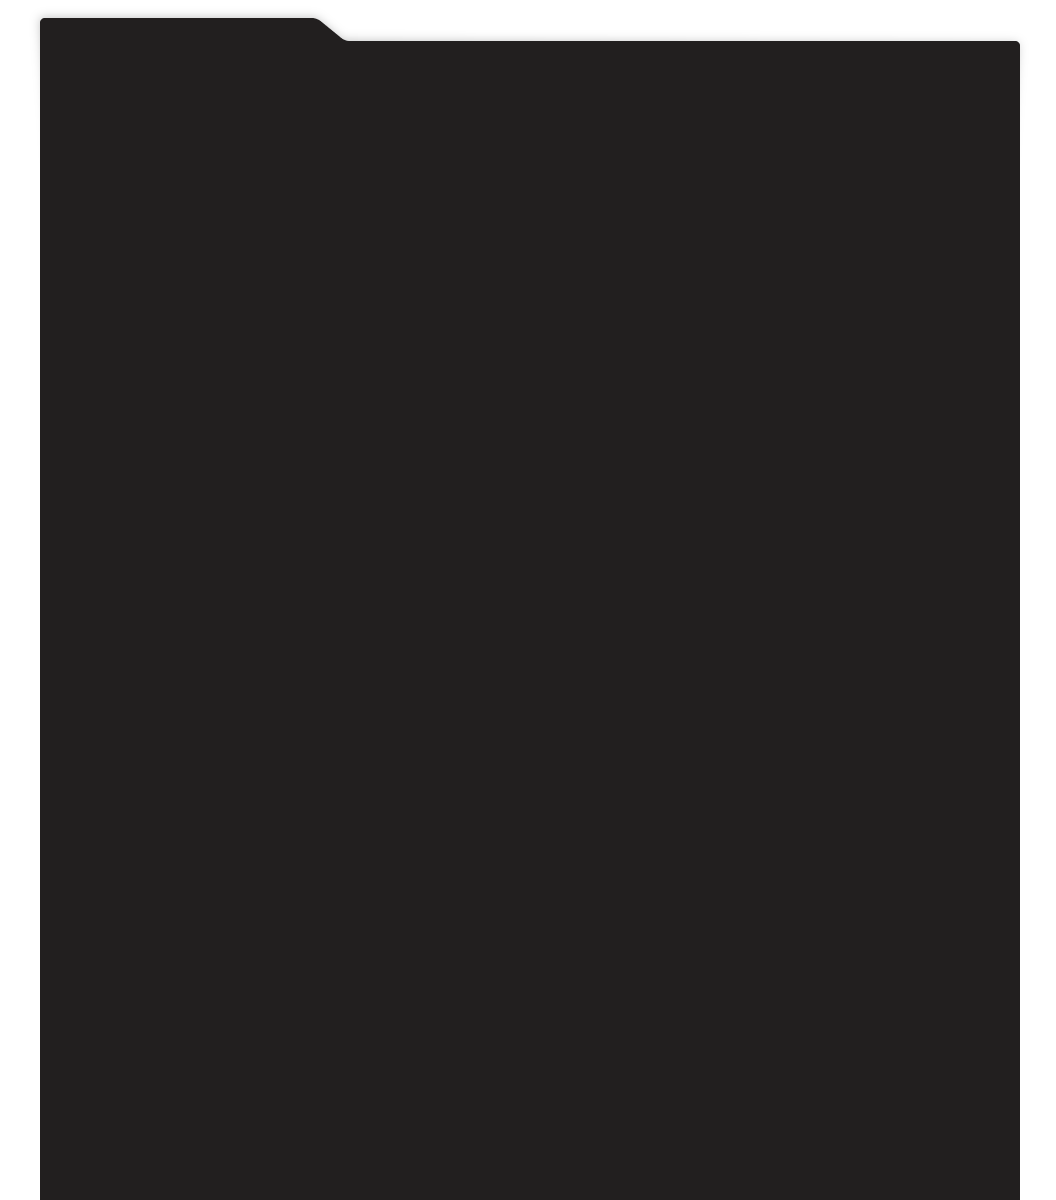
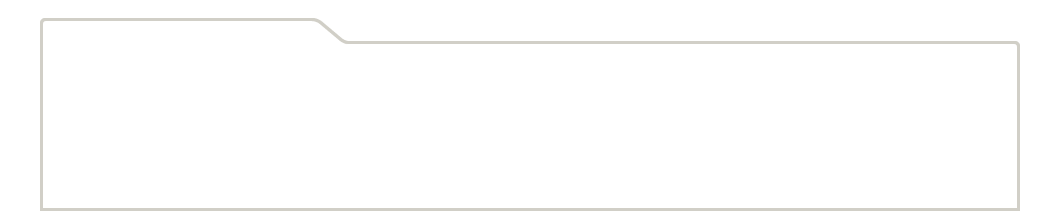
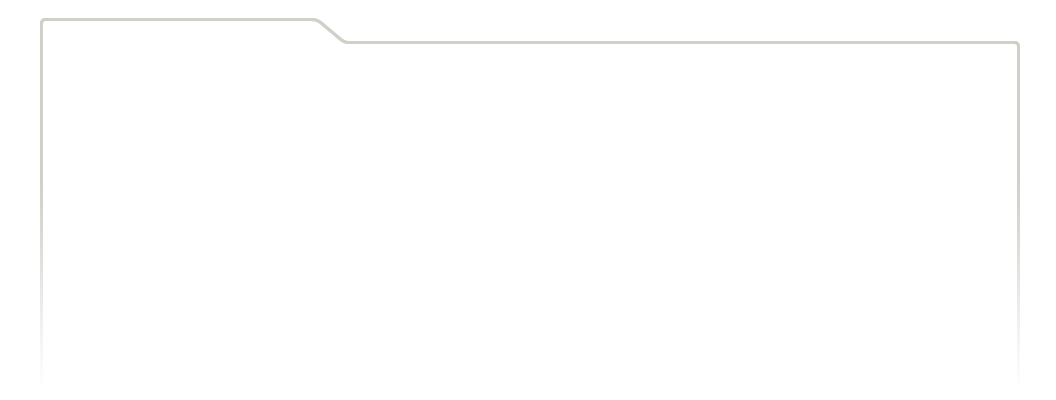
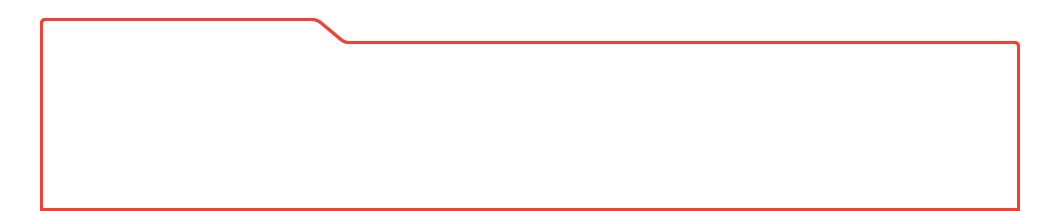
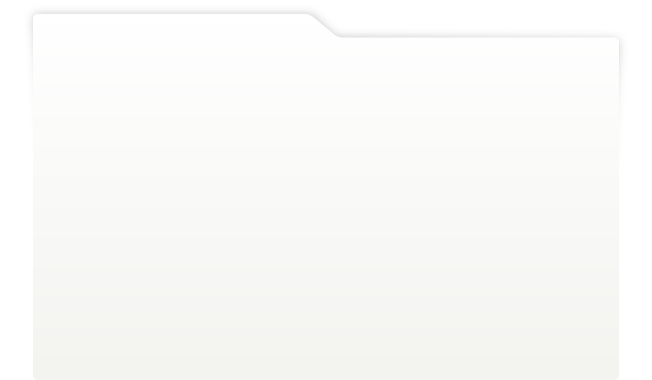
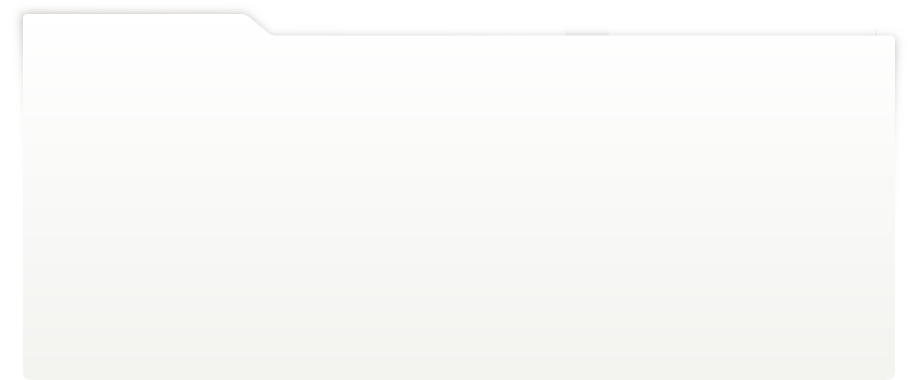
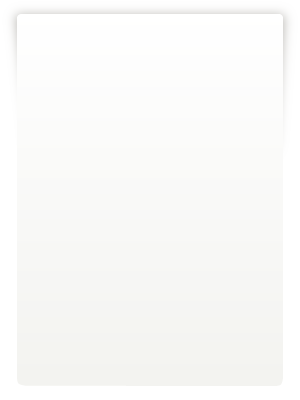
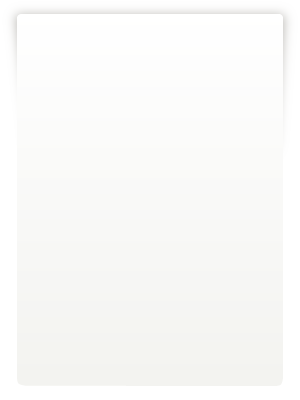
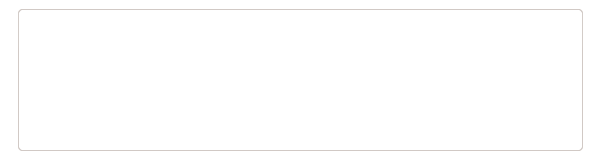
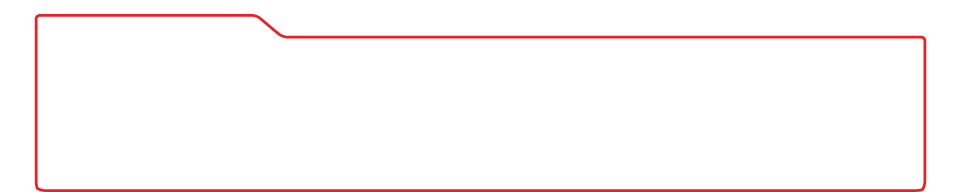
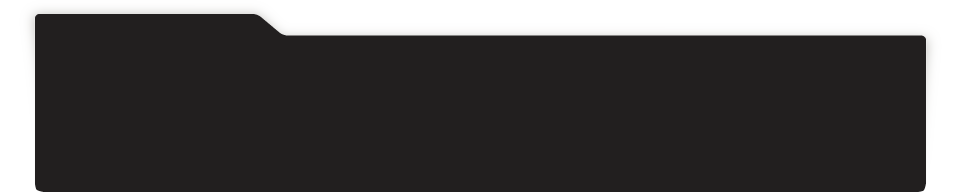
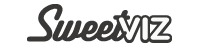
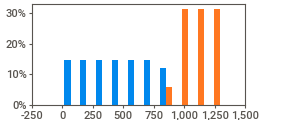
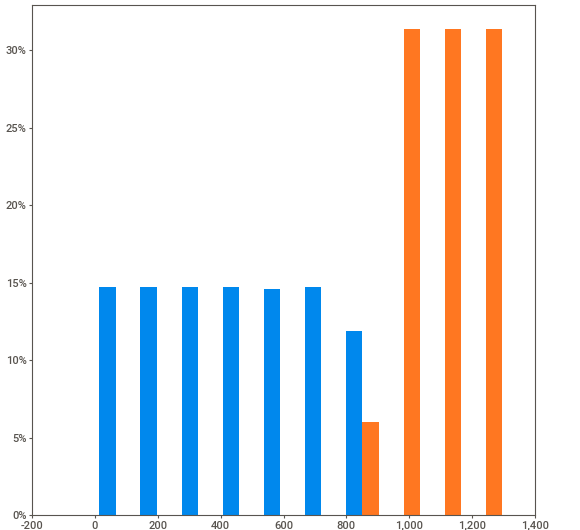
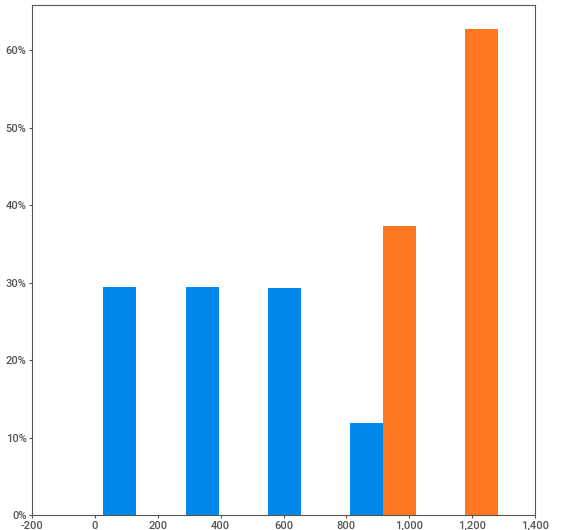
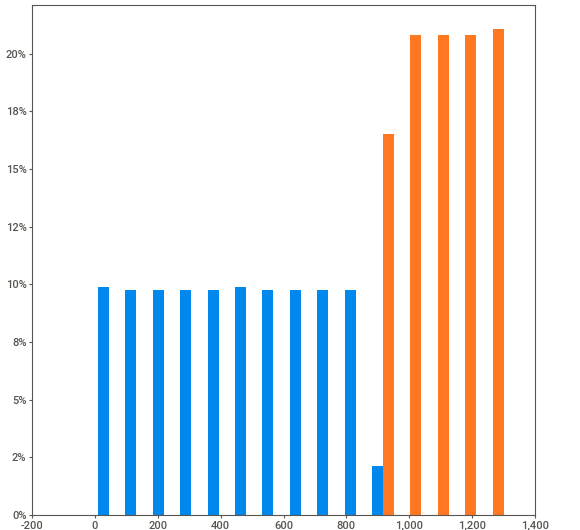
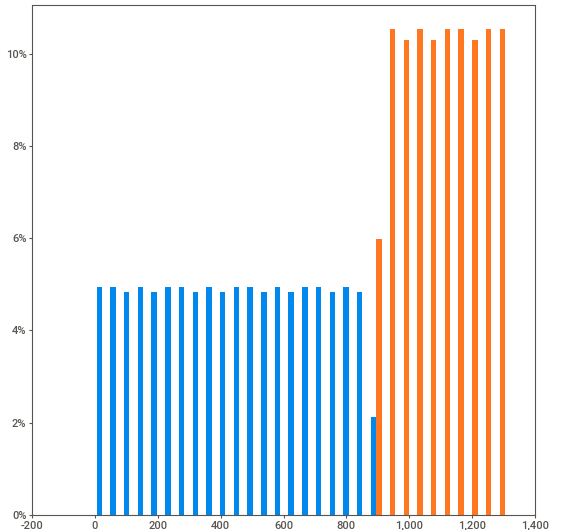
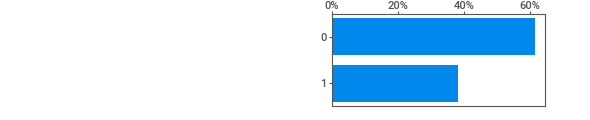
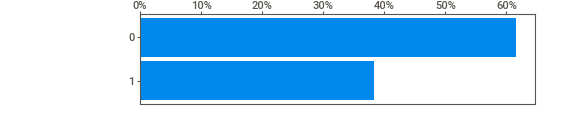
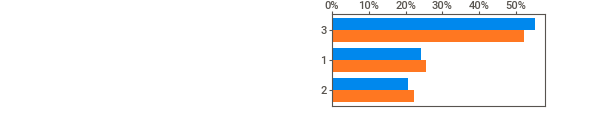
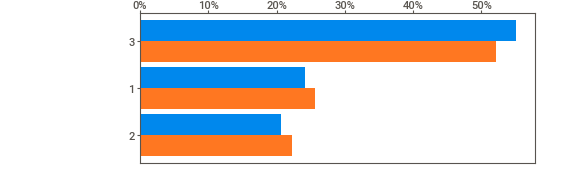
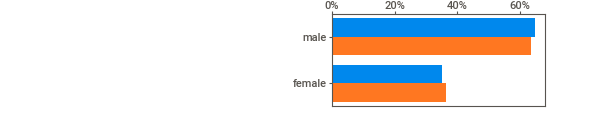
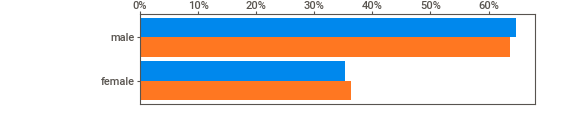
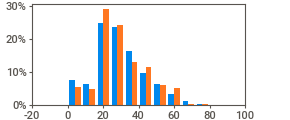
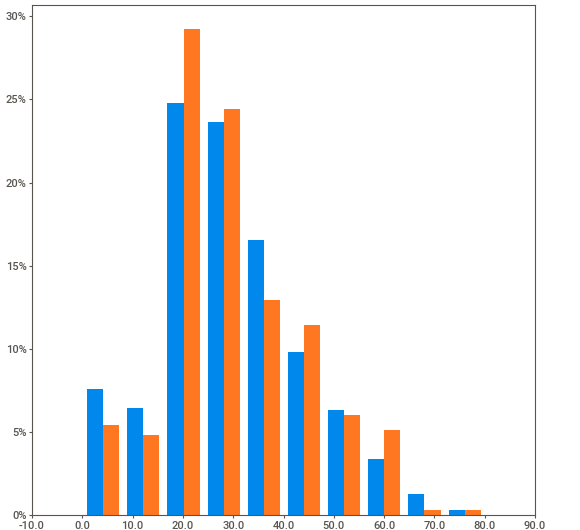
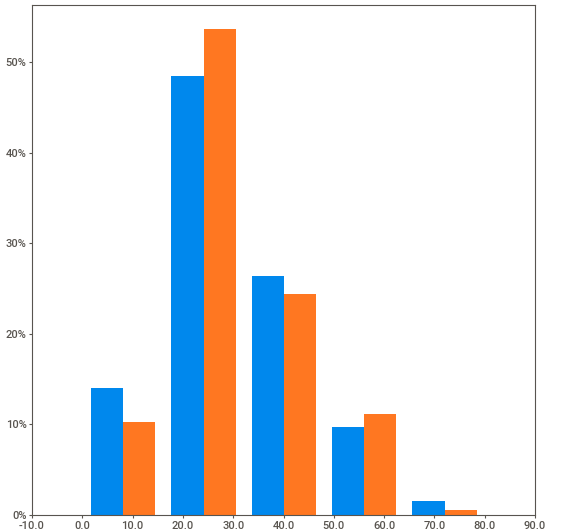
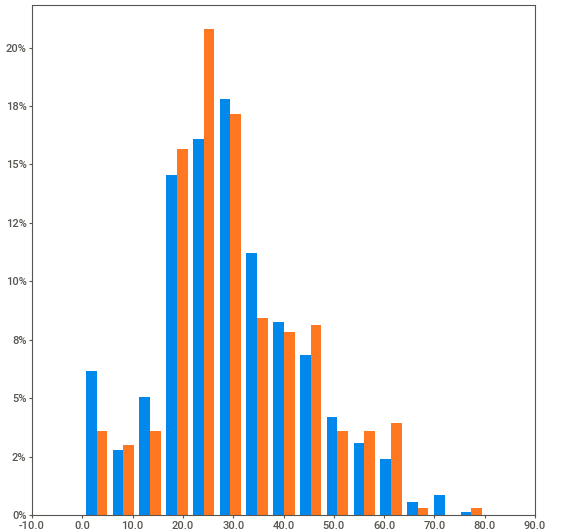
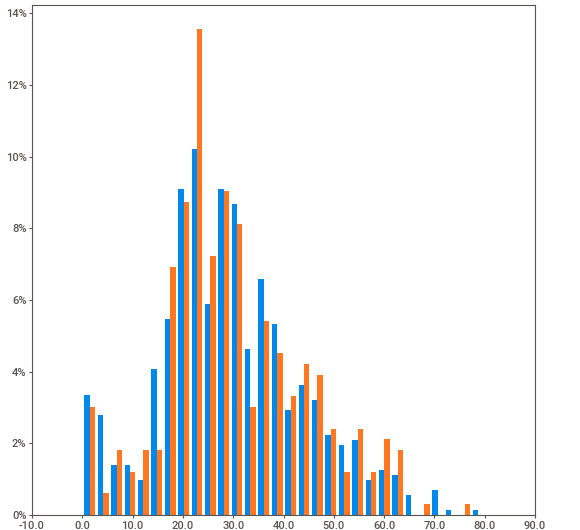
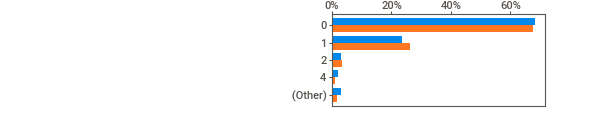
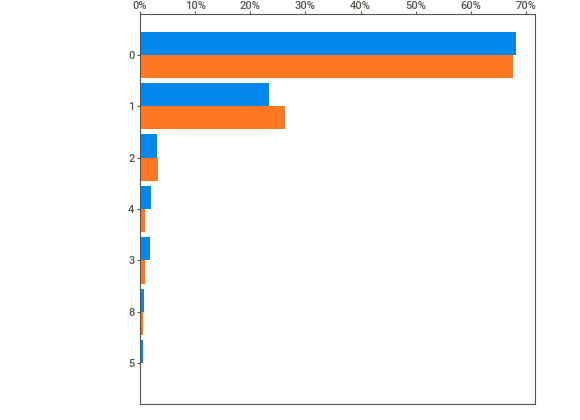
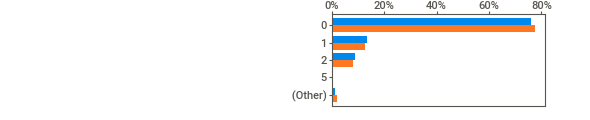
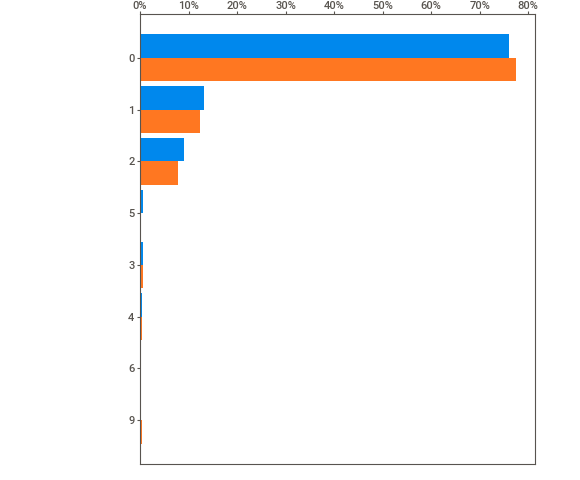
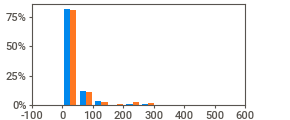
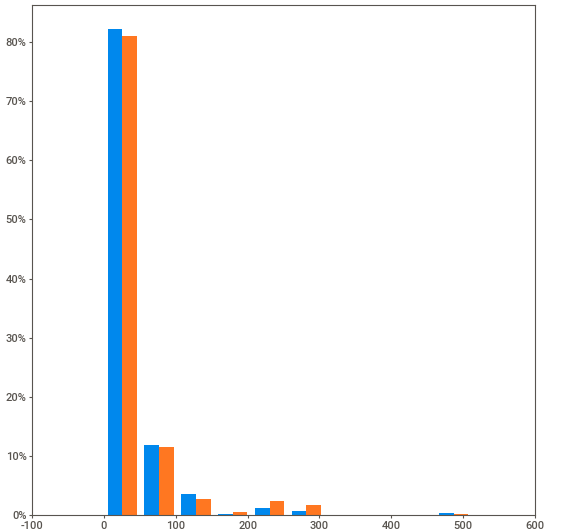
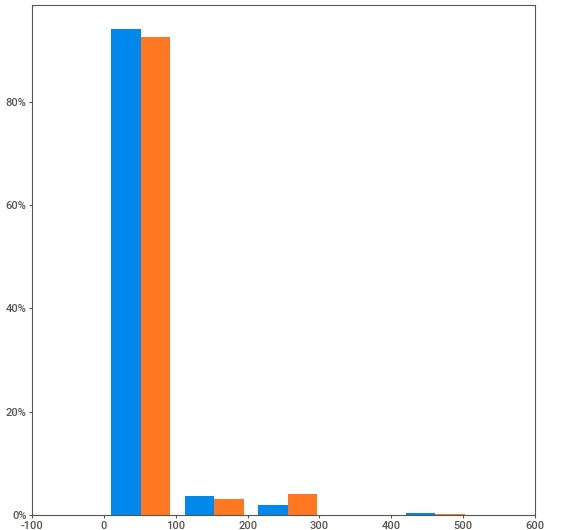
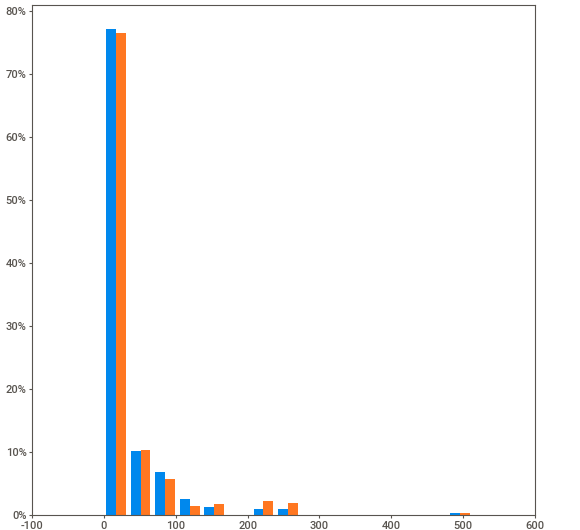
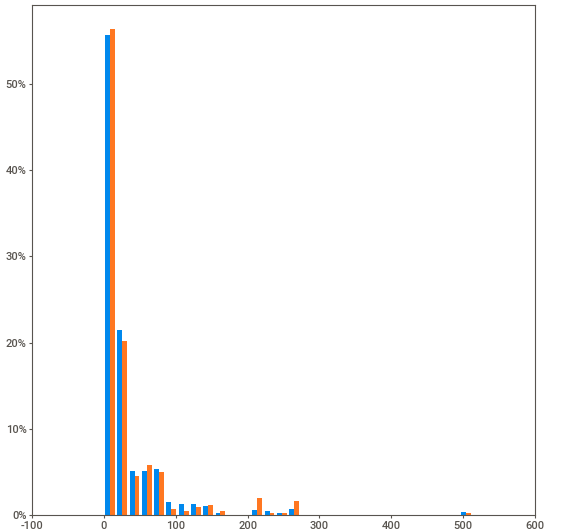
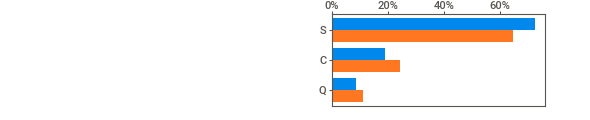
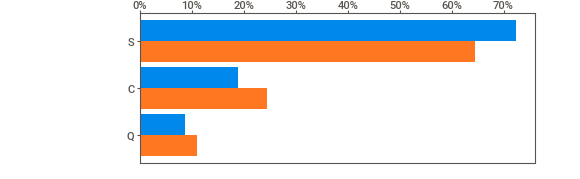
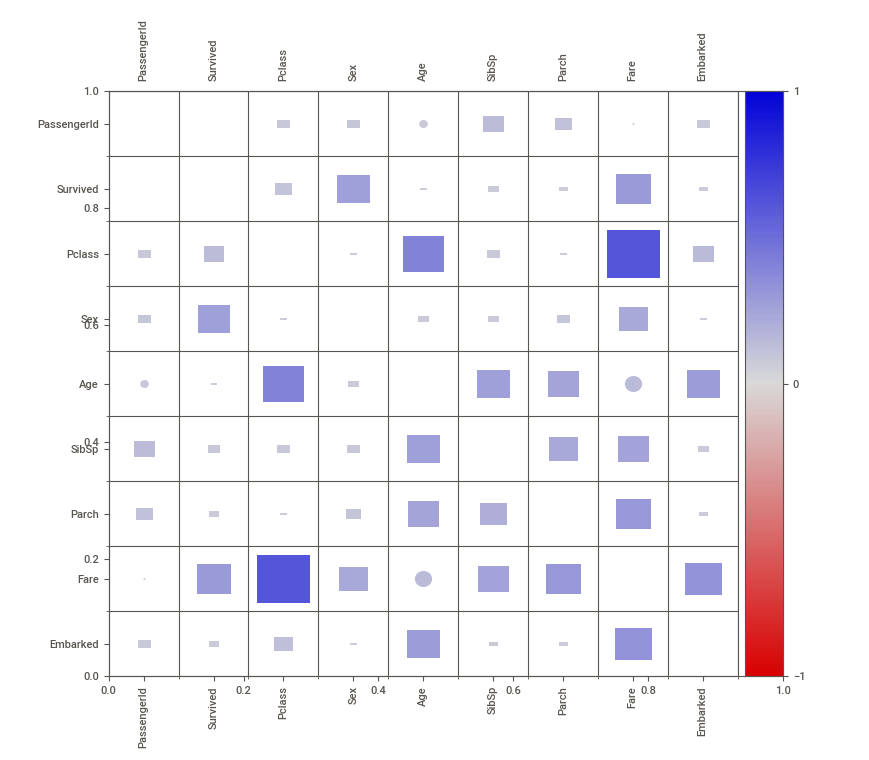
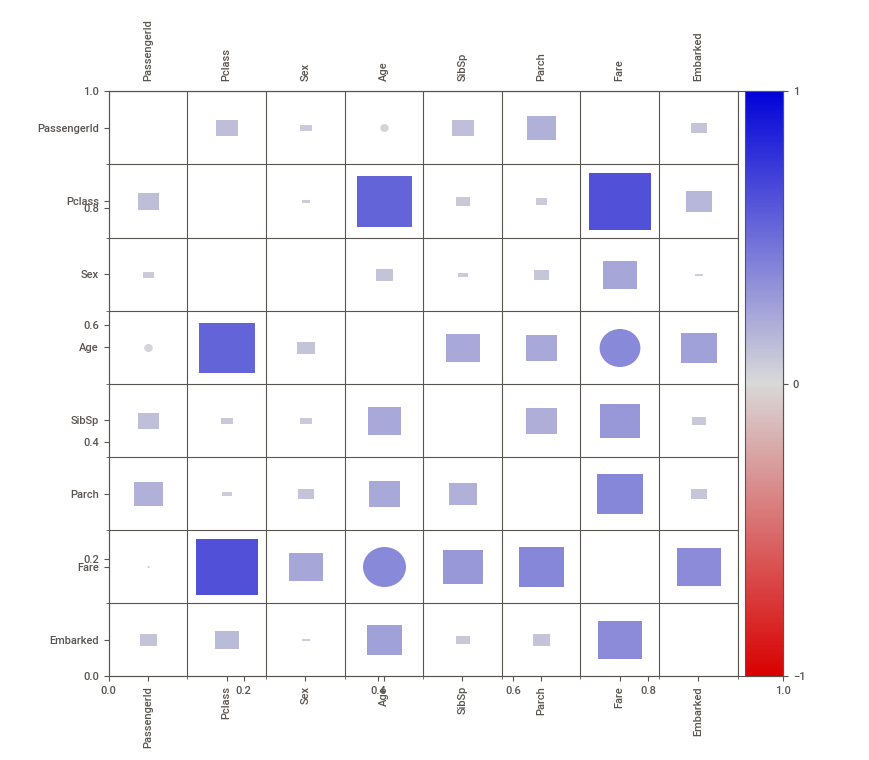

In [117]:
# применим метод .show_notebook()
comparison.show_notebook()

## График в Matplotlib

### Стиль графика

In [ ]:
# создадим последовательность для оси x
c_var = np.linspace(0, 10, 100)

In [119]:
# снова зададим размеры графиков и одновременно установим стиль Seaborn
sns.set(rc={"figure.figsize": (8, 5)})

#### Цвет графика

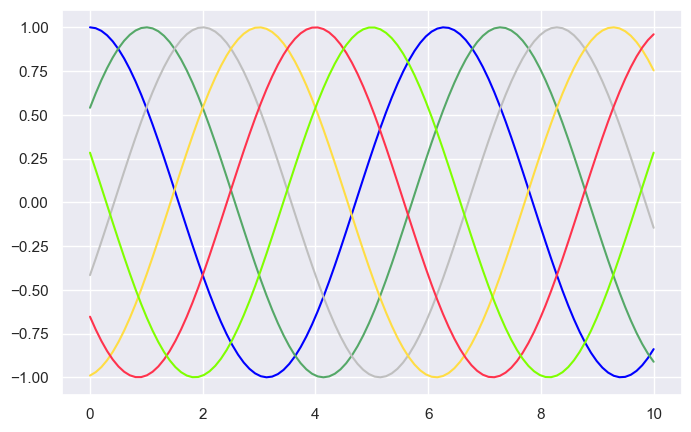

In [120]:
# создадим несколько графиков функции косинуса со сдвигом
# и зададим цвет каждого графика одним из доступных в Matplotlib способов
plt.plot(c_var, np.cos(c_var - 0), color="blue")  # по названию
plt.plot(c_var, np.cos(c_var - 1), color="g")  # по короткому названию (rgbcmyk)
plt.plot(c_var, np.cos(c_var - 2), color="0.75")  # оттенки серого от 0 до 1
plt.plot(c_var, np.cos(c_var - 3), color="#FFDD44")  # HEX код (RRGGBB от 00 до FF)
plt.plot(
    c_var, np.cos(c_var - 4), color=(1.0, 0.2, 0.3)
)  # RGB кортеж, значения от 0 до 1
plt.plot(c_var, np.cos(c_var - 5), color="chartreuse");  # CSS название цветов

#### Тип линии графика

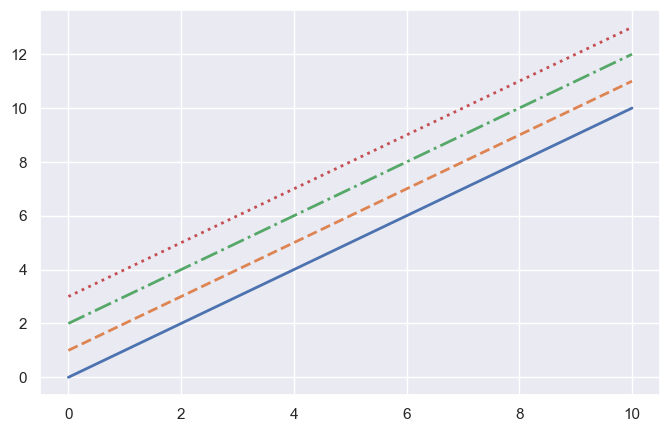

In [121]:
# посмотрим на возможный тип линии графика
plt.plot(c_var, c_var + 0, linestyle="solid", linewidth=2)
plt.plot(c_var, c_var + 1, linestyle="dashed", linewidth=2)
plt.plot(c_var, c_var + 2, linestyle="dashdot", linewidth=2)
plt.plot(c_var, c_var + 3, linestyle="dotted", linewidth=2);

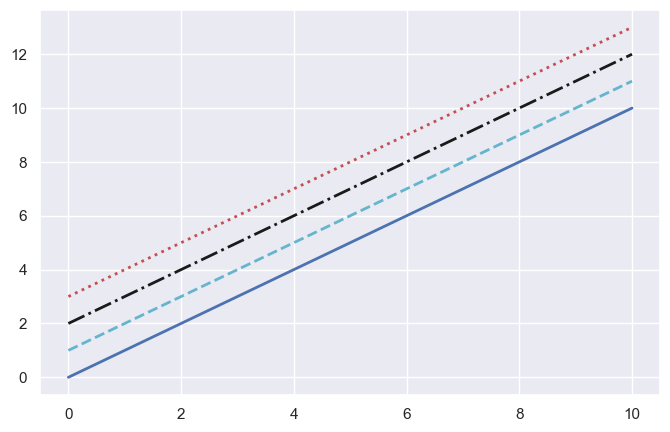

In [122]:
# создадим различные линии с помощью строки форматирования
plt.plot(c_var, c_var + 0, "-b", linewidth=2)  # сплошная синяя линия (по умолчанию)
plt.plot(
    c_var, c_var + 1, "--c", linewidth=2
)  # штриховая линия цвета морской волны (cyan)
plt.plot(c_var, c_var + 2, "-.k", linewidth=2)  # черная (key) штрихпунктирная линия
plt.plot(c_var, c_var + 3, ":r", linewidth=2);  # красная линия из точек

#### Стиль точечной диаграммы

In [ ]:
# зададим точку отсчета
np.random.seed(42)
# и последовательность из 10-ти случайных целых чисел от 0 до 10
d_var = np.random.randint(10, size=10)

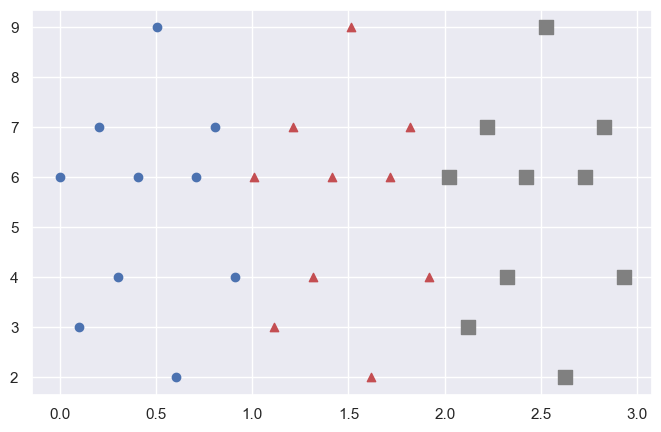

In [124]:
# выведем первые 10 наблюдений в виде синих (b) кругов (o)
plt.scatter(c_var[:10], d_var, c="b", marker="o")
# выведем вторые 10 наблюдений в виде красных (r) треугольников (^)
plt.scatter(c_var[10:20], d_var, c="r", marker="^")
# выведем третьи 10 наблюдений в виде серых (0.50) квадратов (s)
# дополнительно укажем размер квадратов s = 100
plt.scatter(c_var[20:30], d_var, c="0.50", marker="s", s=100);

#### Стиль графика в целом

In [125]:
# посмотрим на доступные стили
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

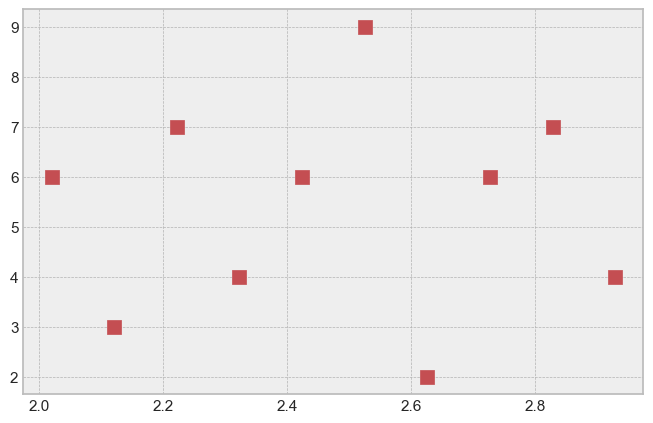

In [126]:
# применим стиль bmh
plt.style.use("bmh")

# и создадим точечную диаграмму с квадратными красными маркерами размера 100
plt.scatter(c_var[20:30], d_var, s=100, c="r", marker="s");

In [127]:
# вернем блокнот к "заводским" настройкам (стиль default)
# такой стиль тоже есть, хотя он не указан в перечне plt.style.available
plt.style.use("default")

# дополнительно пропишем размер последующих графиков
matplotlib.rcParams["figure.figsize"] = (5, 4)
matplotlib.rcParams["figure.figsize"]

[5.0, 4.0]

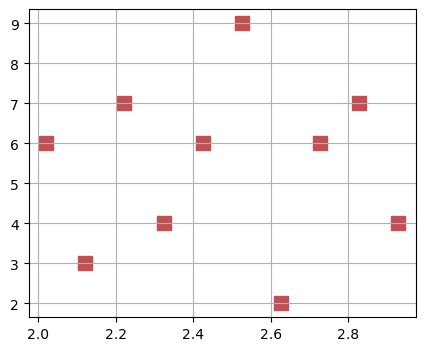

In [128]:
# дополним белый прямоугольник сеткой и снова выведем график
plt.grid()
plt.scatter(c_var[20:30], d_var, s=100, c="r", marker="s");

### Пределы шкалы и деления осей графика

#### Пределы шкалы

Способ 1. Функции `plt.xlim()` и `plt.ylim()`

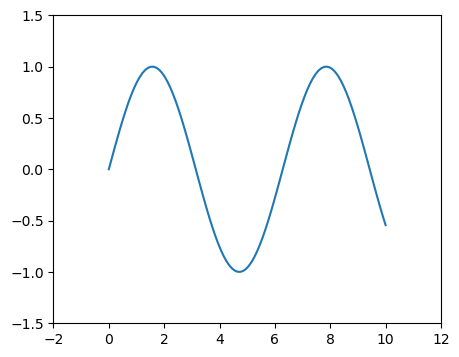

In [129]:
# выведем график функции синуса
plt.plot(c_var, np.sin(c_var))

# пропишем пределы шкалы по обеим осям
plt.xlim(-2, 12)
plt.ylim(-1.5, 1.5);

Способ 2. Функция `plt.axis()`

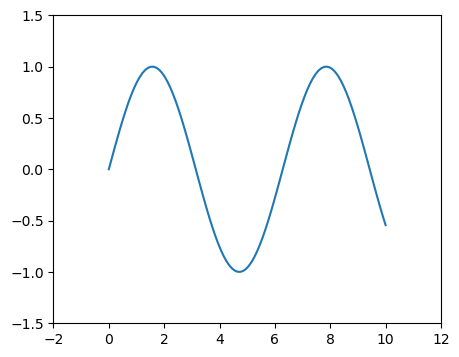

In [ ]:
# выведем график функции синуса
plt.plot(c_var, np.sin(c_var))

# зададим пределы графика с помощью функции plt.axis()
# передадим параметры в следующей очередности: xmin, xmax, ymin, ymax
plt.axis([-2, 12, -1.5, 1.5]);

#### Деления

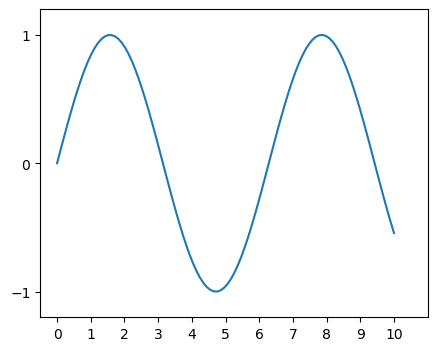

In [131]:
# построим синусоиду и зададим график ее осей
plt.plot(c_var, np.sin(c_var))
plt.axis([-0.5, 11, -1.2, 1.2])

# создадим последовательность от 0 до 10 с помощью функции np.arange()
# и передадим ее в функцию plt.xticks()
plt.xticks(np.arange(11))

# в функцию plt.yticks() передадим созданный вручную список
plt.yticks([-1, 0, 1]);

### Подписи, легенда и размеры графика

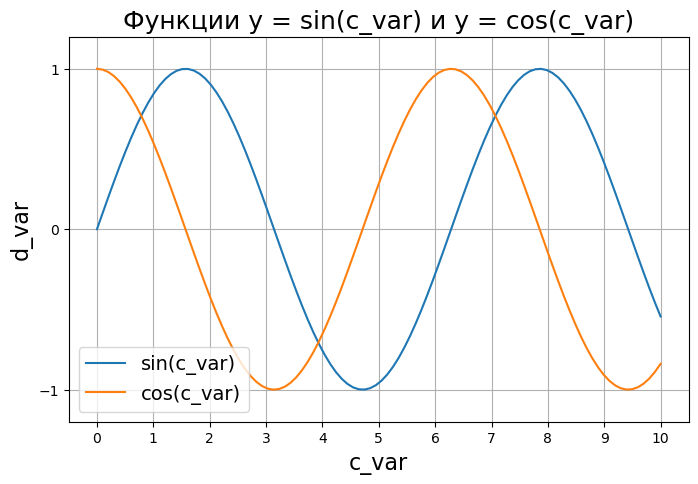

In [132]:
# зададим размеры отдельного графика (лучше указывать в начале кода)
plt.figure(figsize=(8, 5))

# добавим графики синуса и косинуса с подписями к кривым
plt.plot(c_var, np.sin(c_var), label="sin(c_var)")
plt.plot(c_var, np.cos(c_var), label="cos(c_var)")

# выведем легенду (подписи к кривым) с указанием места на графике и размера шрифта
plt.legend(loc="lower left", prop={"size": 14})

# добавим пределы шкал по обеим осям,
plt.axis([-0.5, 10.5, -1.2, 1.2])

# а также деления осей графика
plt.xticks(np.arange(11))
plt.yticks([-1, 0, 1])

# добавим заголовок и подписи к осям с указанием размера шрифта
plt.title("Функции y = sin(c_var) и y = cos(c_var)", fontsize=18)
plt.xlabel("c_var", fontsize=16)
plt.ylabel("d_var", fontsize=16)

# добавим сетку
plt.grid()

# выведем результат
plt.show()

### `plt.figure()` и `plt.axes()`

In [133]:
sns.set_style("whitegrid")

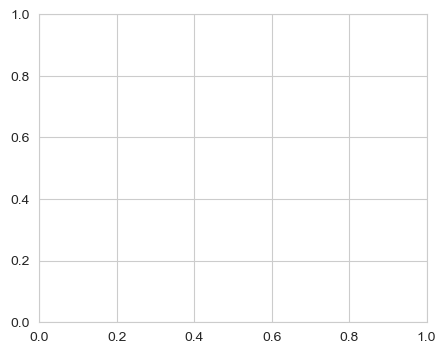

In [134]:
# создадим объект класса plt.figure()
fig = plt.figure()

# создадим объект класса plt.axes()
ax = plt.axes()

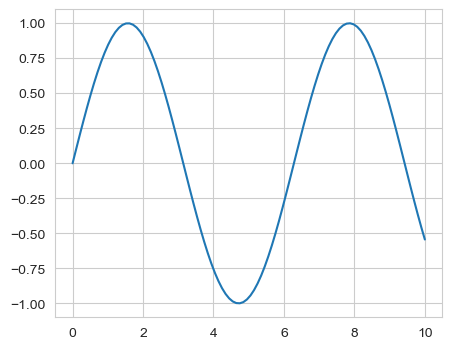

In [135]:
# создадим объект класса plt.figure()
fig = plt.figure()

# создадим объект класса plt.axes()
ax = plt.axes()

# добавим синусоиду к объекту ax с помощью метода .plot()
ax.plot(c_var, np.sin(c_var));

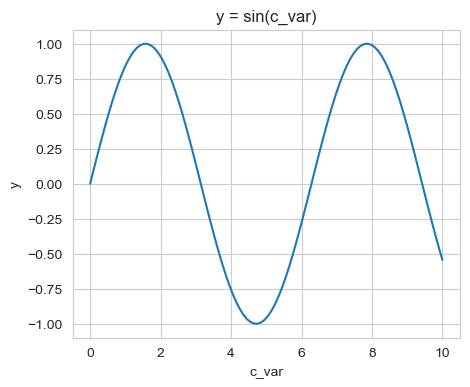

In [136]:
fig = plt.figure()
ax = plt.axes()
ax.plot(c_var, np.sin(c_var))

# используем методы класса plt.axes()
ax.set_title("y = sin(c_var)")
ax.set_xlabel("c_var")
ax.set_ylabel("y");

### Построение подграфиков

#### Создание вручную

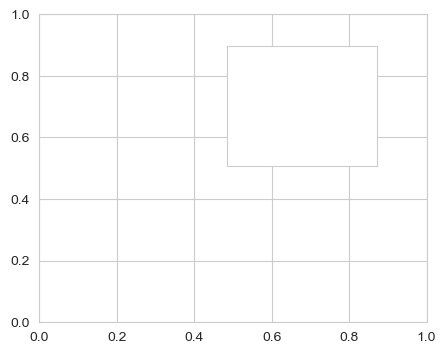

In [137]:
# создадим объект fig,
fig = plt.figure()

# стандартный подграфик
ax1 = plt.axes()

# и подграфик по следующим координатам и размерам
ax2 = plt.axes([0.5, 0.5, 0.3, 0.3])

# дополнительно покажем, как можно убрать деления на "вложенном" подграфике
ax2.set(xticks=[], yticks=[]);

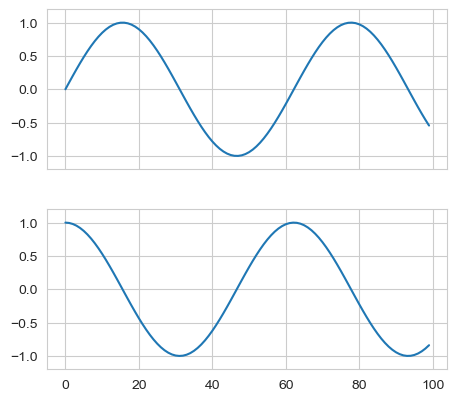

In [138]:
# создадим объект класса plt.figure()
fig = plt.figure()

# зададим координаты угла [0.1, 0.6] и размеры [0.8, 0.4] верхнего подграфика,
# дополнительно зададим пределы шкалы по оси y и уберем шкалу по оси x
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4], ylim=(-1.2, 1.2), xticklabels=[])

# добавим координаты угла [[0.1, 0.1] и размеры [0.8, 0.4] нижнего подграфика
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

# выведем на них синусоиду и косинусоиду соответственно
ax1.plot(np.sin(c_var))
ax2.plot(np.cos(c_var));

#### Метод `.add_subplot()`

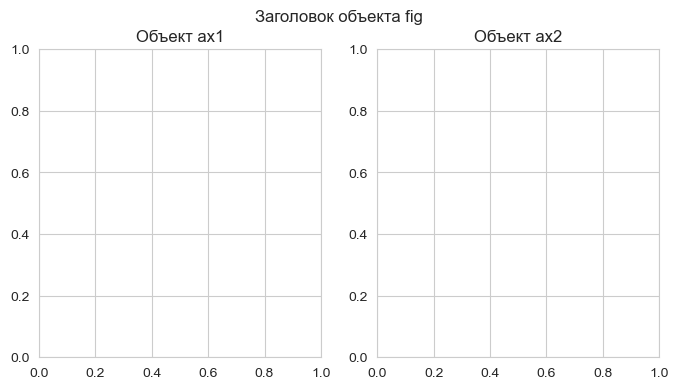

In [139]:
# создаем объект figure, задаем размер объекта,
fig = plt.figure(figsize=(8, 4))
# указываем общий заголовок через метод .suptitle()
fig.suptitle(
    "Заголовок объекта fig"
)  # можно использовать plt.suptitle('Заголовок объекта fig')

# внутри него создаем объект ax1, прописываем сетку из одной строки и двух столбцов
# и положение (индекс) ax1 в сетке
ax1 = fig.add_subplot(1, 2, 1)
# используем метод .set_title() для создания заголовка объекта ax1
ax1.set_title("Объект ax1")

# создаем и наполняем объект ax2
# запятые для значений сетки не обязательны, а заголовок можно передать параметром
ax2 = fig.add_subplot(122, title="Объект ax2")

plt.show()

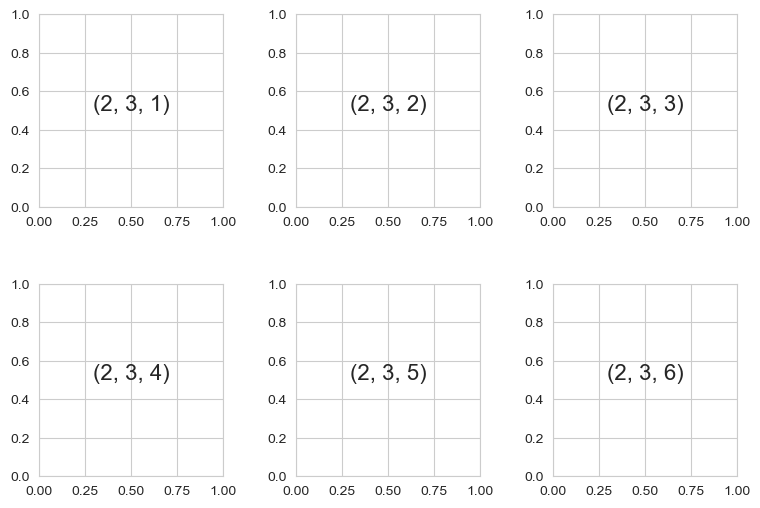

In [140]:
# создадим объект figure и зададим его размер
fig = plt.figure(figsize=(9, 6))
# укажем горизонтальное и вертикальное расстояние между графиками
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# в цикле от 1 до 6 (так как у нас будет шесть подграфиков)
for i in range(1, 7):
    # поочередно создадим каждый подграфик
    # первые два параметра задают сетку, в переменной i содержится индекс подграфика
    ax = fig.add_subplot(2, 3, i)
    # метод .text() позволяет написать текст в заданном месте подграфика
    ax.text(
        0.5,
        0.5,  # разместим текст в центре
        str((2, 3, i)),  # выведем параметры сетки и индекс графика
        fontsize=16,  # зададим размер текста
        ha="center",
    )  # сделаем выравнивание по центру

#### Функция `plt.subplots()`

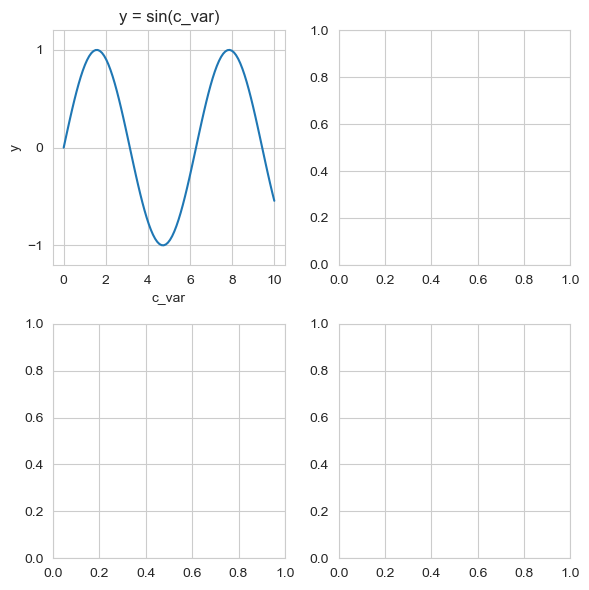

In [141]:
# создаем объекты fig и ax
# в параметрах указываем число строк и столбцов, а также размер фигуры
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# с помощью индекса объекта ax заполним левый верхний график
ax[0, 0].plot(c_var, np.sin(c_var))

# через метод .set() задаем параметры графика
ax[0, 0].set(
    title="y = sin(c_var)",
    xlabel="c_var",
    ylabel="y",
    xlim=(-0.5, 10.5),
    ylim=(-1.2, 1.2),
    xticks=(np.arange(0, 11, 2)),
    yticks=[-1, 0, 1],
)

plt.tight_layout();

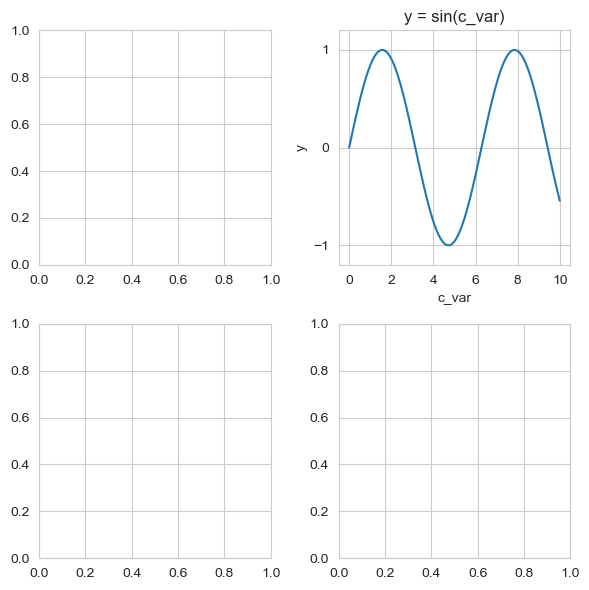

In [142]:
# передадим подграфики в соответствующие переменные
# в первых внутренних скобках - первая строка, во вторых - вторая
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6))

# поместим функцию np.sin(x) во второй столбец первой строки
ax2.plot(c_var, np.sin(c_var))
ax2.set(
    title="y = sin(c_var)",
    xlabel="c_var",
    ylabel="y",
    xlim=(-0.5, 10.5),
    ylim=(-1.2, 1.2),
    xticks=(np.arange(0, 11, 2)),
    yticks=[-1, 0, 1],
)

plt.tight_layout();

In [ ]:
# возьмем данные о продажах в четырех магазинах
sales_2: pd.DataFrame = pd.DataFrame(
    {
        "year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
        "store 1": [35, 43, 76, 31, 46, 33, 26, 22, 23, 35],
        "store 2": [31, 40, 66, 25, 46, 34, 23, 22, 27, 35],
        "store 3": [33, 41, 66, 35, 34, 37, 27, 28, 22, 38],
        "store 4": [35, 45, 61, 27, 42, 38, 25, 29, 24, 31],
    }
)

# сделаем столбец year индексом
sales_2.set_index("year", inplace=True)

# посмотрим на данные
sales_2

store 1  store 2  store 3  store 4
year                                    
2000       35       31       33       35
2001       43       40       41       45
2002       76       66       66       61
2003       31       25       35       27
2004       46       46       34       42
2005       33       34       37       38
2006       26       23       27       25
2007       22       22       28       29
2008       23       27       22       24
2009       35       35       38       31

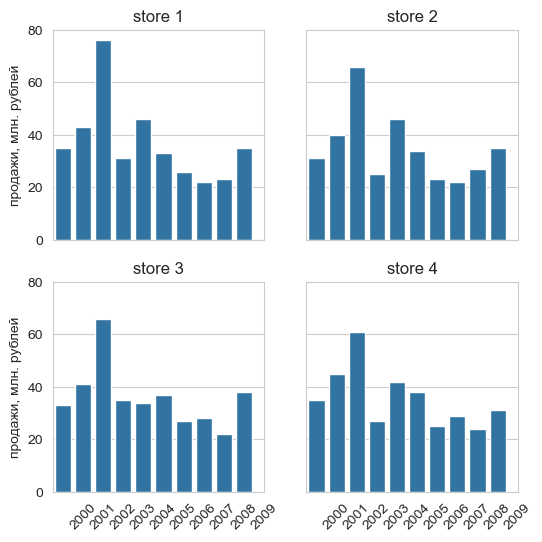

In [ ]:
# определимся с количеством строк и столбцов
nrows, ncols = 2, 2
# создадим счетчик для столбцов
col = 0

# создадим объекты fig и ax (в ax уже будет четыре подграфика)
# дополнительно, помимо размера, зададим общую шкалу по обеим осям
fig, ax = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6, 6), sharex=True, sharey=True
)

# в цикле пройдемся по строкам
for e_var in range(nrows):
    # затем во вложенном цикле - по столбцам
    for f_var in range(ncols):
        # для каждой комбинации i и j (координат подграфика) выведем
        # столбчатую диаграмму Seaborn
        # по оси x - годы, по оси y - соответстующий столбец (магазин)
        # в параметр ax мы передадим текущий подграфик с координатами
        sns.barplot(x=sales_2.index, y=sales_2.iloc[:, col], ax=ax[e_var, f_var])

        # дополнительно в методе .set() зададим заголовок подграфика,
        # уберем подпись к оси x и зададим единые для всех подграфиков пределы по оси y
        ax[e_var, f_var].set(title=sales_2.columns[col], xlabel="", ylim=(0, 80))
        # укажем, количество делений шкалы (по сути, список от 1 до 10)
        ax[e_var, f_var].set_xticks(list(range(1, len(sales_2.index) + 1)))
        # в качестве делений шкалы по оси x зададим годы и повернем их на 45 градусов
        ax[e_var, f_var].set_xticklabels(sales_2.index, rotation=45)

        # общая шкала по осям предполагает общие деления, но не общую подпись,
        # чтобы подпись оси y была только слева от первого столбца, выведем ее при j == 0
        # (индекс j как раз отвечает за столбцы)
        if f_var == 0:
            ax[e_var, f_var].set_ylabel("продажи, млн. рублей")
        # в противном случае выведем пустую подпись
        else:
            ax[e_var, f_var].set_ylabel("")

        # обновим счетчик столбцов
        col += 1

# выведем результат
plt.show()

#### Метод `.plot()` библиотеки Pandas

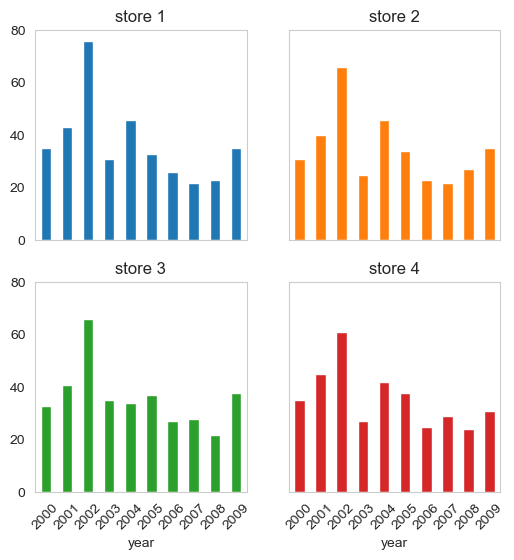

In [145]:
# применим метод .plot() ко всем столбцам датафрейма
sales_2.plot(
    subplots=True,  # укажем, что хотим создать подграфики
    layout=(2, 2),  # пропишем размерность сетки
    kind="bar",  # укажем тип графика
    figsize=(6, 6),  # зададим размер фигуры
    sharey=True,  # сделаем общую шкалу по оси y
    ylim=(0, 80),  # зададим пределы по оси y
    grid=False,  # уберем сетку
    legend=False,  # уберем легенду
    rot=45,
);  # повернем подписи к делениям по оси x на 45 градусов

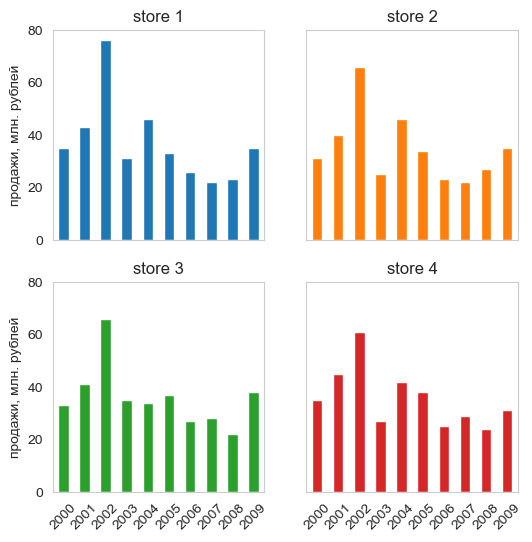

In [146]:
# зададим размер строк и столбцов
nrows, ncols = 2, 2

ax = sales_2.plot(
    subplots=True,  # укажем, что хотим создать подграфики
    layout=(nrows, ncols),  # пропишем размерность сетки
    kind="bar",  # укажем тип графика
    figsize=(6, 6),  # зададим размер фигуры
    sharey=True,  # сделаем общую шкалу по оси y
    ylim=(0, 80),  # зададим пределы по оси y
    grid=False,  # уберем сетку
    legend=False,  # уберем легенду
    rot=45,
)
# повернем подписи к делениям по оси x на 45 градусов

# пройдемся по индексам столбцов и строк
for g_var in range(nrows):
    for h_var in range(ncols):

        # удалим подписи к оси x
        ax[g_var, h_var].set_xlabel("")

        # сделаем подписи по оси y только к первому столбцу
        if h_var == 0:
            ax[g_var, h_var].set_ylabel("продажи, млн. рублей")
        else:
            ax[g_var, h_var].set_ylabel("")

In [ ]:
# продемонстрируем, как выглядят индексы подграфиков
# при использовании вложенных циклов
for i_var in range(nrows):
    for j_var in range(ncols):
        print(i_var, j_var)

0 0
0 1
1 0
1 1


## Ответы на вопросы

**Вопрос**. Как посмотреть, какая версия библиотеки используется в Google Colab?

In [148]:
# версию можно посмотрет так
matplotlib.__version__

'3.9.2'

In [149]:
# обратимся к более подробной информации
!pip show matplotlib

Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in

In [150]:
# посмотрим, упоминается ли слово matplotlib в списке библиотек
# и если да, выведем название библиотеки с этим словом и ее версию
!pip list | grep matplotlib

'grep' is not recognized as an internal or external command,
operable program or batch file.
